## Project Objective & Hypothesis

About this dataset: The lung cancer dataset consists of the following attributes - 

Age: Age of the person in years

Smoking: Whether the individual is a smoker or not

Yellow_fingers: whether the person has yellow fingers (a possible sign of smoking or not) or not

Anxiety: Whether the person experiences anxiety or not

Peer_pressure: Whether the individual has a peer pressure to smoke

Chronic_disease: Whether the person has a chronic disease or not

Fatigue: Whether the person experiences fatigue or not

Allergy: Whether the person has allergies or not

Wheezing: Whether the individual experiences wheezing or not

Lung_Cancer: Whether the person has lung_cancer or not

Target Variable: Lung_Cancer

Independent/Explanatory Variables: Age, Smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing

Objective: The main objective of this project is to analyze this lung cancer dataset and develop a predictive model to accurately identify individuals with a higher risk  of developing lung cancer based on various factors such as age, smoking, chronic disease, wheezing and other related attributes. This model can be used as a tool for early diagnosis of lung cancer and help the healthcare professionals in identifying the high-risk cancer patients, leading to improved patient outcomes. 

Hypothesis: A good hypothesis to prove or disprove in this case might be the following – 
Smoking is the strongest predictor of lung cancer and other factors such as age, chronic disease and wheezing have a lesser impact on the development of lung cancer.

To test the hypothesis, a statistical analysis could be performed to determine the correlation between each attribute and the occurrence of lung cancer, as well as the strength of the relationship between smoking and lung cancer relative to other attributes. Basically, the objective is to build a predictive model to see how accurately it can predict the occurrence of lung cancer based on the different attributes, with the focus on the impact of smoking as a predictor. 


In [79]:
# Import the following dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.formula.api as smf



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## Loading the data

In [120]:
# Load the csv file into a pandas dataframe
df = pd.read_csv('C:\\Rohan\\SharpestMinds - Projects\\Project 2\\survey lung cancer.csv')

## Understanding the data

In [121]:
# Obtain the first 5 rows of this dataset
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [122]:
# Obtain the last 5 rows of this dataset
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [123]:
# Obtain all the columns of this dataset
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [124]:
# Obtain the data types for each of the attributes in this dataset
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [125]:
# Obtain more info for each of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [126]:
# Obtain the structure of this dataset
str(df)

'    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \\\n0        M   69        1               2        2              1   \n1        M   74        2               1        1              1   \n2        F   59        1               1        1              2   \n3        M   63        2               2        2              1   \n4        F   63        1               2        1              1   \n..     ...  ...      ...             ...      ...            ...   \n304      F   56        1               1        1              2   \n305      M   70        2               1        1              1   \n306      M   58        2               1        1              1   \n307      M   67        2               1        2              1   \n308      M   62        1               1        1              2   \n\n     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \\\n0                  1         2         1         2                  2   \n1                  

In [127]:
# Obtain the dimensions of this dataset
df.shape

(309, 16)

The lung cancer dataset has about 309 rows and 16 attributes

## Data Cleansing

### Handling Missing Data

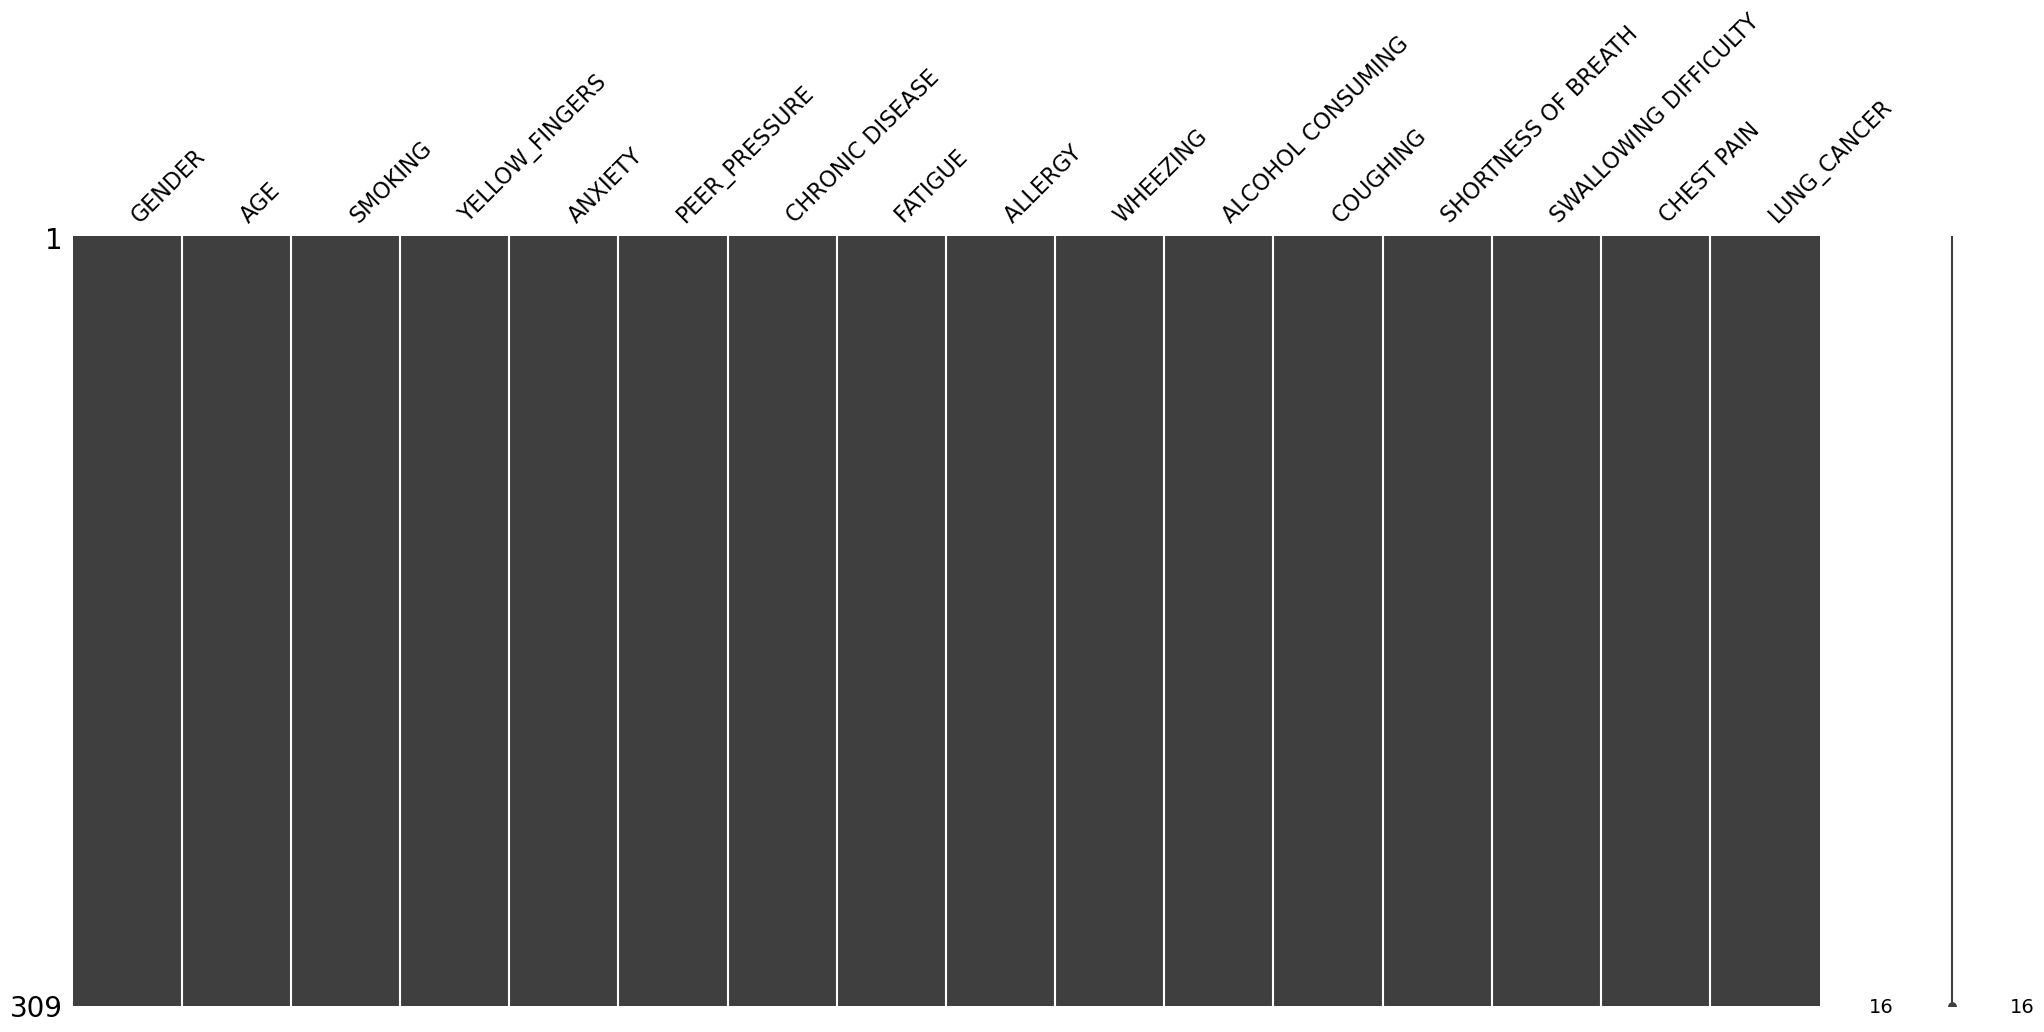

In [128]:
# Visualize missing values as a matrix
msno.matrix(df);

Using this matrix we can very quickly find the pattern of missingness in the dataset.

From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

In [129]:
# Obtain the number of missing values for each of the attributes
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

We can observe that this dataframe has no missing values

### Handling Duplicate Records

In [130]:
# Find the number of duplicate records in this dataframe
num_duplicates = df.duplicated().sum()

print(f'There are {num_duplicates} duplicate rows in the DataFrame.')

There are 33 duplicate rows in the DataFrame.


In [131]:
# Drop all the duplicate records
df.drop_duplicates(inplace = True)

In [132]:
# Check if the duplicate rows are removed
df.duplicated().sum()

0

### Outlier Detection

Outliers are observations in a dataset that deviate significantly from other observations. These observations are often considered unusual or anomalous, and can have a major impact on statistical analyses and models.

The importance of outliers in data analysis depends on the context and purpose of the analysis. In some cases, outliers may be the result of errors or measurement issues and should be removed in order to ensure accurate results. However, in other cases, outliers may be legitimate data points that provide important insights or information about the underlying distribution or behavior of the data.

Text(0.5, 1.0, 'Outliers for the attribute Age')

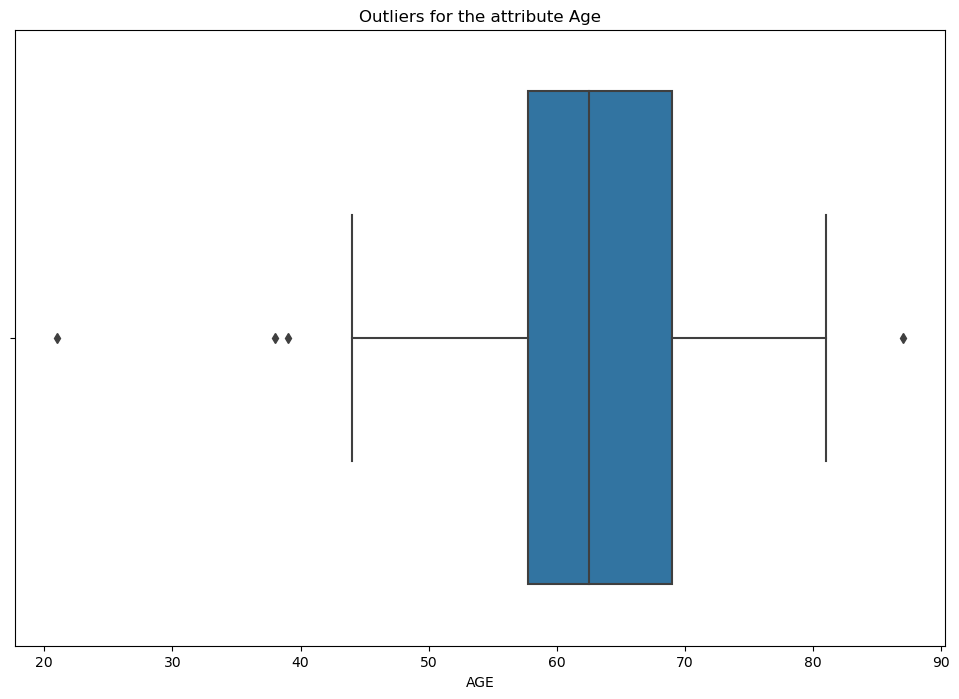

In [93]:
# Create a boxplot to detect outliers for the numerical attribute "age"
plt.figure(figsize = (12, 8))
sns.boxplot(x = df['AGE'])
plt.title("Outliers for the attribute Age")

From the given boxplot, we can see that this attribute "age" has 3 outliers. Most of the patients ages' range between 45 years to 80 years. One of the outliers is a patient whose age is above 80 years and the other 2 outliers are patients below the age of 40 years. 

## Data Summary

Finding summary statistics for data is important because it provides a concise and informative description of the data. Summary statistics allow us to understand key characteristics of the data, such as the central tendency, variability, and distribution of the data.

In [16]:
# Obtain the summary statistics for this dataset
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [17]:
# Obtain the summary statistics only for the attribute "age"
sub_df = df.copy()[["AGE"]]
sub_df.describe()

,AGE
count,276.000000
mean,62.909420
std,8.379355
min,21.000000
25%,57.750000
50%,62.500000
75%,69.000000
max,87.000000


In [133]:
# Obtain the summary statistics only for the attributes "gender" & "lung_cancer"
summary = df[['GENDER', 'LUNG_CANCER']].describe()
print(summary)

       GENDER LUNG_CANCER
count     276         276
unique      2           2
top         M         YES
freq      142         238


Let's replace all the numeric values into categorical values for better and efficient visualization. All the 2's and 1's will be replaced by "YES" and "NO" accordingly. And replace "M" and "F" by "Male" and "Female" accordingly in "GENDER" column.

In [134]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Smoking"
df['SMOKING'] = df['SMOKING'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,Yes,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,No,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,Yes,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,No,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [135]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Yellow_Fingers"
df['YELLOW_FINGERS'] = df['YELLOW_FINGERS'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,Yes,No,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,No,No,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,Yes,Yes,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,No,Yes,1,1,1,1,1,2,1,2,2,1,1,NO


In [136]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Anxiety"
df['ANXIETY'] = df['ANXIETY'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,Yes,No,No,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,No,No,No,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,Yes,Yes,Yes,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,No,Yes,No,1,1,1,1,2,1,2,2,1,1,NO


In [137]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Peer Pressure"
df['PEER_PRESSURE'] = df['PEER_PRESSURE'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,1,2,1,2,2,2,2,2,2,YES
1,M,74,Yes,No,No,No,2,2,2,1,1,1,2,2,2,YES
2,F,59,No,No,No,Yes,1,2,1,2,1,2,2,1,2,NO
3,M,63,Yes,Yes,Yes,No,1,1,1,1,2,1,1,2,2,NO
4,F,63,No,Yes,No,No,1,1,1,2,1,2,2,1,1,NO


In [138]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Chronic Disease"
df['CHRONIC DISEASE'] = df['CHRONIC DISEASE'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,2,1,2,2,2,2,2,2,YES
1,M,74,Yes,No,No,No,Yes,2,2,1,1,1,2,2,2,YES
2,F,59,No,No,No,Yes,No,2,1,2,1,2,2,1,2,NO
3,M,63,Yes,Yes,Yes,No,No,1,1,1,2,1,1,2,2,NO
4,F,63,No,Yes,No,No,No,1,1,2,1,2,2,1,1,NO


In [139]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Fatigue"
df['FATIGUE '] = df['FATIGUE '].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,1,2,2,2,2,2,2,YES
1,M,74,Yes,No,No,No,Yes,Yes,2,1,1,1,2,2,2,YES
2,F,59,No,No,No,Yes,No,Yes,1,2,1,2,2,1,2,NO
3,M,63,Yes,Yes,Yes,No,No,No,1,1,2,1,1,2,2,NO
4,F,63,No,Yes,No,No,No,No,1,2,1,2,2,1,1,NO


In [140]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Allergy"
df['ALLERGY '] = df['ALLERGY '].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,2,2,2,2,2,2,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,1,1,1,2,2,2,YES
2,F,59,No,No,No,Yes,No,Yes,No,2,1,2,2,1,2,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,1,2,1,1,2,2,NO
4,F,63,No,Yes,No,No,No,No,No,2,1,2,2,1,1,NO


In [141]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Wheezing"
df['WHEEZING'] = df['WHEEZING'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,2,2,2,2,2,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,1,1,2,2,2,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,1,2,2,1,2,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,2,1,1,2,2,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,1,2,2,1,1,NO


In [142]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Alcohol Consuming"
df['ALCOHOL CONSUMING'] = df['ALCOHOL CONSUMING'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,2,2,2,2,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,1,2,2,2,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,2,2,1,2,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,1,1,2,2,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,2,2,1,1,NO


In [143]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Coughing"
df['COUGHING'] = df['COUGHING'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,2,2,2,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,2,2,2,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,2,1,2,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,1,2,2,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,2,1,1,NO


In [144]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Coughing"
df['SHORTNESS OF BREATH'] = df['SHORTNESS OF BREATH'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,2,2,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,2,2,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,1,2,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,2,2,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,1,1,NO


In [145]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Swallowing Difficulty"
df['SWALLOWING DIFFICULTY'] = df['SWALLOWING DIFFICULTY'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,2,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,2,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,2,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,2,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,1,NO


In [146]:
# Create a dictionary to map the numerical values to their categorical values
cat_map = {1 : 'No', 2: 'Yes'}

# Replace all the numerical values into categorical values for the attribute "Chest Pain"
df['CHEST PAIN'] = df['CHEST PAIN'].replace(cat_map).astype('category')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


In [147]:
# For the attribute "Gender" replace all the M's with 'Male' & F'S with Female
df['GENDER'].replace('M', 'Male', inplace=True)
df['GENDER'].replace('F', 'Female', inplace=True)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


In [148]:
# Obtain the statistical summary of age grouped by the attributes "gender", "lung_cancer", "smoking"
sub_df4 = df.copy()[["GENDER", "LUNG_CANCER", "SMOKING", "AGE"]]
sub_df4.groupby(['GENDER', 'LUNG_CANCER', 'SMOKING']).describe()

AGE                                           \
                           count       mean        std   min    25%   50%   
GENDER LUNG_CANCER SMOKING                                                  
Female NO          No       11.0  63.000000   8.555700  56.0  58.50  61.0   
                   Yes      10.0  58.200000  14.273519  21.0  57.00  59.5   
       YES         No       53.0  64.566038   9.388023  38.0  57.00  64.0   
                   Yes      60.0  62.466667   7.725078  44.0  56.00  62.0   
Male   NO          No        8.0  59.625000   7.249384  46.0  58.00  59.5   
                   Yes       9.0  61.555556   7.485171  47.0  56.00  63.0   
       YES         No       54.0  63.314815   7.231545  44.0  59.25  63.0   
                   Yes      71.0  62.929577   8.071686  39.0  57.50  62.0   

                                         
                              75%   max  
GENDER LUNG_CANCER SMOKING               
Female NO          No       63.00  87.0  
                   Yes      67.00  71.0  
       YES         No       72.00  81.0  
                   Yes      67.25  78.0  
Male   NO          No       62.75  69.0  
                   Yes      68.00  69.0  
       YES         No       69.00  78.0  
                   Yes      69.00  79.0

In [149]:
# Obtain the summary statistics for the attribute "age" grouped by "gender", "lung_cancer", "yellow_fingers"
sub_df5 = df.copy()[["GENDER", "LUNG_CANCER", "YELLOW_FINGERS", "AGE"]]
sub_df5.groupby(['GENDER', 'LUNG_CANCER', 'YELLOW_FINGERS']).describe()

AGE                                     \
                                  count       mean        std   min    25%   
GENDER LUNG_CANCER YELLOW_FINGERS                                            
Female NO          No              14.0  60.714286  14.111799  21.0  58.25   
                   Yes              7.0  60.714286   4.029652  57.0  57.00   
       YES         No              29.0  64.034483   7.885261  49.0  57.00   
                   Yes             84.0  63.250000   8.831590  38.0  56.75   
Male   NO          No              11.0  64.090909   4.887833  55.0  60.50   
                   Yes              6.0  54.333333   6.683313  46.0  49.00   
       YES         No              63.0  62.206349   8.076567  39.0  56.50   
                   Yes             62.0  64.000000   7.233800  44.0  60.00   

                                                      
                                    50%    75%   max  
GENDER LUNG_CANCER YELLOW_FINGERS                     
Female NO          No              60.5  66.75  87.0  
                   Yes             60.0  63.50  67.0  
       YES         No              63.0  70.00  81.0  
                   Yes             62.5  71.00  81.0  
Male   NO          No              64.0  68.50  69.0  
                   Yes             55.5  58.25  63.0  
       YES         No              62.0  68.50  79.0  
                   Yes             63.5  69.00  78.0

In [35]:
# Obtain the summary statistics for the attribute "age" grouped by "gender", "lung_cancer", "anxiety"

sub_df5 = df.copy()[["GENDER", "LUNG_CANCER", "ANXIETY", "AGE"]]
sub_df5.groupby(['GENDER', 'LUNG_CANCER', 'ANXIETY']).describe()

AGE                                           \
                           count       mean        std   min    25%   50%   
GENDER LUNG_CANCER ANXIETY                                                  
Female NO          No       17.0  60.882353  12.712604  21.0  58.00  61.0   
                   Yes       4.0  60.000000   5.715476  55.0  56.50  58.5   
       YES         No       40.0  63.850000   9.099310  38.0  56.75  63.5   
                   Yes      73.0  63.232877   8.324196  44.0  57.00  62.0   
Male   NO          No        9.0  61.111111   7.720823  47.0  55.00  63.0   
                   Yes       8.0  60.125000   7.079901  46.0  58.25  60.5   
       YES         No       73.0  62.287671   8.849795  39.0  56.00  62.0   
                   Yes      52.0  64.230769   5.571691  52.0  60.00  64.0   

                                         
                              75%   max  
GENDER LUNG_CANCER ANXIETY               
Female NO          No       64.00  87.0  
                   Yes      62.00  68.0  
       YES         No       70.25  81.0  
                   Yes      70.00  81.0  
Male   NO          No       69.00  69.0  
                   Yes      64.25  68.0  
       YES         No       70.00  79.0  
                   Yes      68.25  77.0

In [36]:
# Obtain the summary statistics for the attribute "age" grouped by "gender", "lung_cancer", "peer pressure"

sub_df6 = df.copy()[["GENDER", "LUNG_CANCER", "PEER_PRESSURE", "AGE"]]
sub_df6.groupby(['GENDER', 'LUNG_CANCER', 'PEER_PRESSURE']).describe()

AGE                                     \
                                 count       mean        std   min    25%   
GENDER LUNG_CANCER PEER_PRESSURE                                            
Female NO          No             18.0  60.833333  12.505293  21.0  57.25   
                   Yes             3.0  60.000000   3.605551  57.0  58.00   
       YES         No             30.0  63.433333   8.274111  38.0  60.00   
                   Yes            83.0  63.457831   8.725210  44.0  56.00   
Male   NO          No             10.0  58.200000   7.955431  46.0  55.00   
                   Yes             7.0  64.142857   4.413184  59.0  60.50   
       YES         No             78.0  63.230769   7.192931  48.0  58.00   
                   Yes            47.0  62.872340   8.532845  39.0  58.50   

                                                     
                                   50%    75%   max  
GENDER LUNG_CANCER PEER_PRESSURE                     
Female NO          No             60.5  66.00  87.0  
                   Yes            59.0  61.50  64.0  
       YES         No             64.0  70.75  75.0  
                   Yes            62.0  70.00  81.0  
Male   NO          No             57.5  63.75  69.0  
                   Yes            63.0  68.50  69.0  
       YES         No             62.5  69.00  79.0  
                   Yes            63.0  68.50  78.0

In [37]:
# Obtain the summary statistics for the attribute "age" grouped by "gender", "lung_cancer", "chronic disease"

sub_df7 = df.copy()[["GENDER", "LUNG_CANCER", "CHRONIC DISEASE", "AGE"]]
sub_df7.groupby(['GENDER', 'LUNG_CANCER', 'CHRONIC DISEASE']).describe()

AGE                                     \
                                   count       mean        std   min    25%   
GENDER LUNG_CANCER CHRONIC DISEASE                                            
Female NO          No               12.0  60.916667   4.944388  55.0  57.00   
                   Yes               9.0  60.444444  17.378946  21.0  59.00   
       YES         No               39.0  63.615385   7.421928  49.0  59.50   
                   Yes              74.0  63.364865   9.166010  38.0  56.00   
Male   NO          No               13.0  61.153846   6.998168  46.0  56.00   
                   Yes               4.0  59.000000   8.755950  47.0  56.75   
       YES         No               68.0  63.250000   6.892295  39.0  59.00   
                   Yes              57.0  62.912281   8.609133  44.0  57.00   

                                                       
                                     50%    75%   max  
GENDER LUNG_CANCER CHRONIC DISEASE                     
Female NO          No               59.5  64.00  70.0  
                   Yes              62.0  64.00  87.0  
       YES         No               63.0  69.50  78.0  
                   Yes              62.5  70.00  81.0  
Male   NO          No               63.0  68.00  69.0  
                   Yes              60.5  62.75  68.0  
       YES         No               63.0  68.25  77.0  
                   Yes              62.0  71.00  79.0

In [38]:
# Obtain the summary statistics for the attribute "age" grouped by "gender", "lung_cancer", "wheezing", "alcohol consuming"

sub_df9 = df.copy()[["GENDER", "LUNG_CANCER", "WHEEZING", "ALCOHOL CONSUMING", "AGE"]]
sub_df9.groupby(['GENDER', 'LUNG_CANCER', 'WHEEZING', 'ALCOHOL CONSUMING']).describe()

AGE                        \
                                              count       mean        std   
GENDER LUNG_CANCER WHEEZING ALCOHOL CONSUMING                               
Female NO          No       No                 17.0  60.588235  12.786999   
                   Yes      No                  4.0  61.250000   4.787136   
       YES         No       No                 37.0  61.729730   7.855107   
                            Yes                15.0  65.933333   9.199896   
                   Yes      No                 32.0  64.500000   9.974160   
                            Yes                29.0  63.206897   7.316221   
Male   NO          No       No                  8.0  57.875000   8.659223   
                            Yes                 4.0  63.000000   3.559026   
                   Yes      No                  2.0  64.000000   7.071068   
                            Yes                 3.0  62.666667   7.094599   
       YES         No       No                 12.0  64.583333   6.082140   
                            Yes                32.0  62.812500   6.497828   
                   Yes      No                 12.0  62.666667  10.973798   
                            Yes                69.0  63.043478   7.919512   

                                                                               
                                                min    25%   50%    75%   max  
GENDER LUNG_CANCER WHEEZING ALCOHOL CONSUMING                                  
Female NO          No       No                 21.0  57.00  60.0  64.00  87.0  
                   Yes      No                 56.0  58.25  61.0  64.00  67.0  
       YES         No       No                 44.0  56.00  61.0  67.00  77.0  
                            Yes                49.0  59.00  70.0  72.00  81.0  
                   Yes      No                 38.0  59.00  64.5  72.00  81.0  
                            Yes                53.0  56.00  62.0  69.00  77.0  
Male   NO          No       No                 46.0  53.00  57.5  64.25  69.0  
                            Yes                60.0  60.75  62.0  64.25  68.0  
                   Yes      No                 59.0  61.50  64.0  66.50  69.0  
                            Yes                55.0  59.50  64.0  66.50  69.0  
       YES         No       No                 55.0  61.50  64.5  67.50  75.0  
                            Yes                48.0  58.75  63.0  67.25  79.0  
                   Yes      No                 44.0  58.25  62.0  69.50  78.0  
                            Yes                39.0  58.00  63.0  70.00  77.0

In [39]:
# Obtain the summary statistics for the attribute "age" grouped by "gender", "lung_cancer", "fatigue", "allergy", "shortness of breath"
sub_df10 = df.copy()[["GENDER", "LUNG_CANCER", "FATIGUE ", "ALLERGY ", "SHORTNESS OF BREATH", "AGE"]]
sub_df10.groupby(['GENDER', 'LUNG_CANCER', 'FATIGUE ', 'ALLERGY ', 'SHORTNESS OF BREATH']).describe()

AGE             \
                                                         count       mean   
GENDER LUNG_CANCER FATIGUE  ALLERGY  SHORTNESS OF BREATH                    
Female NO          No       No       No                    4.0  59.500000   
                                     Yes                   4.0  60.750000   
                   Yes      No       No                    2.0  61.500000   
                                     Yes                   9.0  65.666667   
                            Yes      Yes                   2.0  40.000000   
       YES         No       No       No                    6.0  59.833333   
                                     Yes                   5.0  60.800000   
                            Yes      No                   13.0  63.769231   
                                     Yes                   8.0  65.750000   
                   Yes      No       No                   11.0  65.545455   
                                     Yes                  30.0  63.766667   
                            Yes      No                   10.0  63.400000   
                                     Yes                  30.0  62.800000   
Male   NO          No       No       No                    8.0  59.125000   
                                     Yes                   2.0  59.500000   
                            Yes      No                    2.0  66.500000   
                   Yes      No       No                    1.0  68.000000   
                                     Yes                   3.0  61.000000   
                            Yes      Yes                   1.0  55.000000   
       YES         No       No       No                    8.0  63.500000   
                                     Yes                   5.0  60.800000   
                            Yes      No                   19.0  63.894737   
                                     Yes                   9.0  64.111111   
                   Yes      No       No                    5.0  59.600000   
                                     Yes                  22.0  62.545455   
                            Yes      No                   13.0  63.769231   
                                     Yes                  44.0  63.204545   

                                                                           \
                                                                std   min   
GENDER LUNG_CANCER FATIGUE  ALLERGY  SHORTNESS OF BREATH                    
Female NO          No       No       No                    3.316625  57.0   
                                     Yes                   5.188127  56.0   
                   Yes      No       No                    9.192388  55.0   
                                     Yes                   9.219544  58.0   
                            Yes      Yes                  26.870058  21.0   
       YES         No       No       No                    8.134290  49.0   
                                     Yes                   7.949843  53.0   
                            Yes      No                    5.974304  56.0   
                                     Yes                   9.602827  49.0   
                   Yes      No       No                    7.878625  54.0   
                                     Yes                   8.402312  44.0   
                            Yes      No                    9.323805  54.0   
                                     Yes                   9.997931  38.0   
Male   NO          No       No       No                    8.576338  46.0   
                                     Yes                   4.949747  56.0   
                            Yes      No                    3.535534  64.0   
                   Yes      No       No                         NaN  68.0   
                                     Yes                   7.211103  55.0   
                            Yes      Yes                        NaN  55.0   
       YES         No       No       No               

## Data Exploration


In [150]:
# Obtain the number of unique values for each of the attributes in this dataset
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [151]:
# Obtain the top 10 oldest patients in the database
df.nlargest(10, 'AGE')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
277,Female,87,No,No,No,No,Yes,Yes,No,No,No,No,Yes,No,No,NO
83,Female,81,No,No,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,YES
101,Female,81,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,YES
204,Male,79,Yes,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,YES
69,Female,78,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,YES
230,Male,78,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,YES
42,Female,77,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,YES
120,Male,77,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,YES
185,Male,77,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,YES
211,Female,77,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,YES


In [152]:
# Obtain the top 10 oldest male patients 
male_patients = df.loc[df['GENDER'] == "Male"]
male_patients.nlargest(10, 'AGE')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
204,Male,79,Yes,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,YES
230,Male,78,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,YES
120,Male,77,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,YES
185,Male,77,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,YES
234,Male,77,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,YES
242,Male,77,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,Yes,YES
133,Male,76,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
16,Male,75,Yes,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
155,Male,75,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES


In [153]:
# Obtain the top 10 oldest female patients
female_patients = df.loc[df['GENDER'] == "Female"]
female_patients.nlargest(10, 'AGE')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
277,Female,87,No,No,No,No,Yes,Yes,No,No,No,No,Yes,No,No,NO
83,Female,81,No,No,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,YES
101,Female,81,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,YES
69,Female,78,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,YES
42,Female,77,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,YES
211,Female,77,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,YES
222,Female,77,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,YES
255,Female,77,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,YES
278,Female,77,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,YES
68,Female,76,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Yes,YES


In [154]:
# Obtain the top 10 oldest female patients who smoke and have lung cancer
female_patients = df.loc[(df['GENDER'] == "Female") & (df['SMOKING'] == "Yes") & (df['LUNG_CANCER'] == "YES")]
female_patients.nlargest(10, 'AGE')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
69,Female,78,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,YES
278,Female,77,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,YES
68,Female,76,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
181,Female,74,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,YES
79,Female,73,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,YES
162,Female,73,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,YES
198,Female,73,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,No,YES
104,Female,72,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,YES
179,Female,72,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,YES
65,Female,71,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,YES


In [155]:
# Obtain the total number of patients who smoke
df['SMOKING'].value_counts()

Yes    150
No     126
Name: SMOKING, dtype: int64

In [156]:
# Find the percentage of the patients who smoke and have cancer vs the ones who smoke and do not have lung cancer
smokers_with_cancer = df.LUNG_CANCER[(df.SMOKING == "Yes") & (df.LUNG_CANCER == "YES")].count()
count_smokers = df.LUNG_CANCER[df.SMOKING == "Yes"].count()
print("Percentage of smokers with lung cancer --->", smokers_with_cancer*100/count_smokers, '%')

smokers_without_cancer = df.LUNG_CANCER[(df.SMOKING == "Yes") & (df.LUNG_CANCER == "NO")].count()
count_smokers = df.LUNG_CANCER[df.SMOKING == "Yes"].count()
print("Percentage of non-smokers with lung cancer --->", smokers_without_cancer*100/count_smokers, '%')

Percentage of smokers with lung cancer ---> 87.33333333333333 %
Percentage of non-smokers with lung cancer ---> 12.666666666666666 %


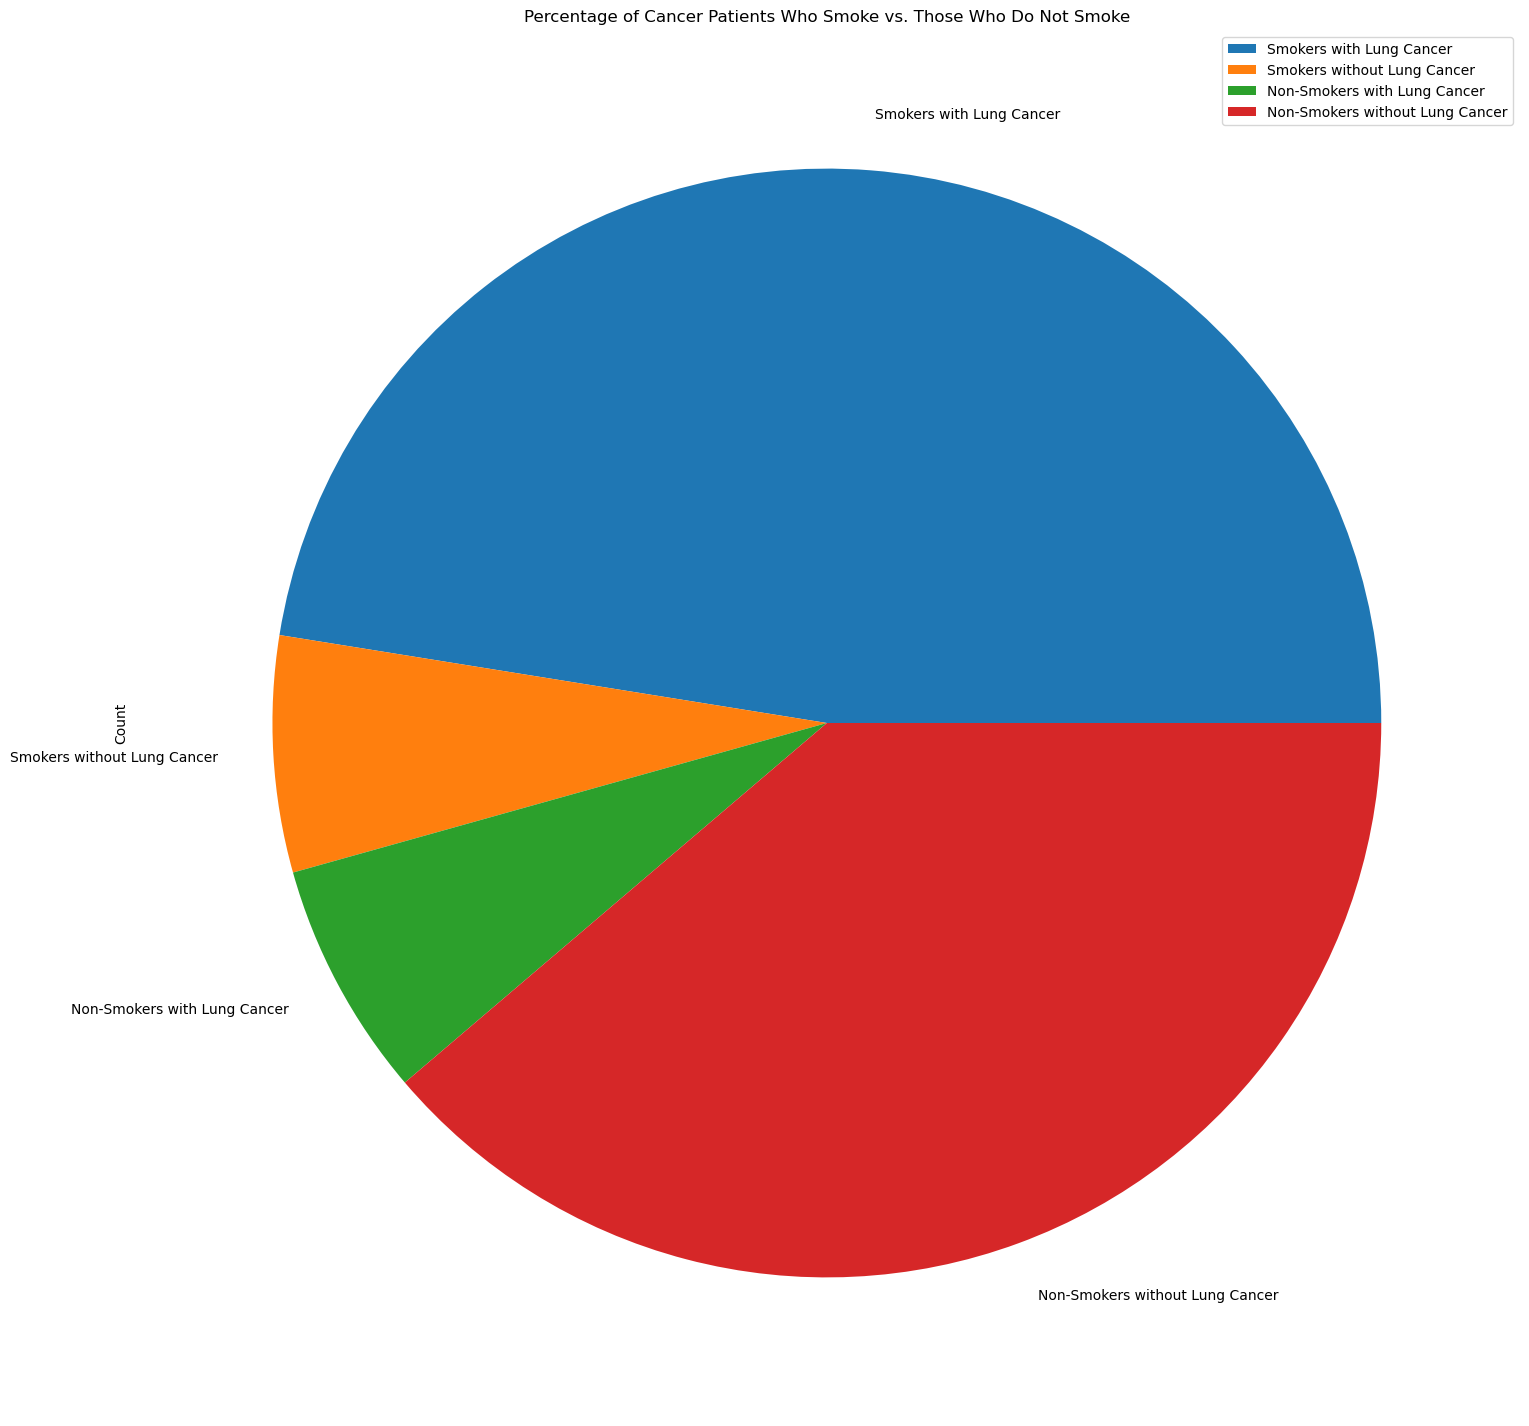

In [47]:
# Create a piechart that displays the percentage of cancer patients who smoke vs the ones that do not
# create a DataFrame with the data
data = {'Smokers with Lung Cancer': smokers_with_cancer,
        'Smokers without Lung Cancer': count_smokers - smokers_with_cancer,
        'Non-Smokers with Lung Cancer': smokers_without_cancer,
        'Non-Smokers without Lung Cancer': len(df) - count_smokers - smokers_without_cancer}

# create a pie chart
df_pie = pd.DataFrame.from_dict(data, orient='index', columns=['Count'])
ax = df_pie.plot.pie(y='Count', figsize=(22, 18))

# set title
ax.set_title('Percentage of Cancer Patients Who Smoke vs. Those Who Do Not Smoke')

# show the plot
plt.show()

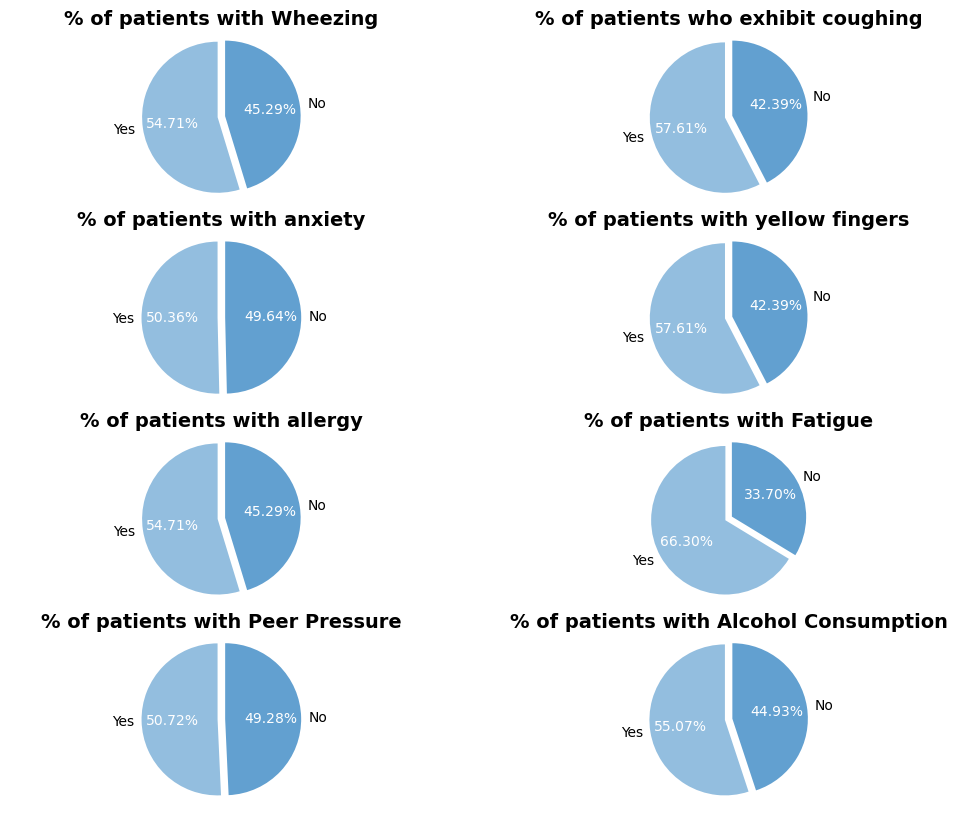

In [157]:
# Create a group of pie charts displaying the percentage of various symptoms exhibited by the patients
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))

# First pie chart
labels1 = ['Yes', 'No']
_, _, texts1 = axes[0,0].pie(df.WHEEZING.value_counts()[:2], labels=labels1, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1), colors=['#93BEDF', '#62A0D0'])
axes[0,0].axis('equal')
axes[0,0].set_title('% of patients with Wheezing', fontsize=14, fontweight='bold')
for text in texts1:
    text.set_color('white')

# Second pie chart
labels2 = ['Yes', 'No']
_, _, texts2 = axes[0,1].pie(df.COUGHING.value_counts()[:2], labels=labels2, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1), colors=['#93BEDF', '#62A0D0'])
axes[0,1].axis('equal')
axes[0,1].set_title('% of patients who exhibit coughing', fontsize=14, fontweight='bold')
for text in texts2:
    text.set_color('white')
    
# Third Pie Chart
labels3 = ['Yes', 'No']
_, _, texts3 = axes[1,0].pie(df.ANXIETY.value_counts()[:2], labels=labels3, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1), colors=['#93BEDF', '#62A0D0'])
axes[1,0].axis('equal')
axes[1,0].set_title('% of patients with anxiety', fontsize=14, fontweight='bold')
for text in texts3:
    text.set_color('white')
    
# Fourth Pie Chart
labels4 = ['Yes', 'No']
_, _, texts4 = axes[1,1].pie(df.YELLOW_FINGERS.value_counts()[:2], labels=labels4, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1), colors=['#93BEDF', '#62A0D0'])
axes[1,1].axis('equal')
axes[1,1].set_title('% of patients with yellow fingers', fontsize=14, fontweight='bold')
for text in texts4:
    text.set_color('white')
    
# Fifth Pie Chart
df = df.rename({'ALLERGY ': 'ALLERGY'}, axis = 1)
labels5 = ['Yes', 'No']
_, _, texts5 = axes[2,0].pie(df.ALLERGY.value_counts()[:2], labels=labels5, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1), colors=['#93BEDF', '#62A0D0'])
axes[2,0].axis('equal')
axes[2,0].set_title('% of patients with allergy', fontsize=14, fontweight='bold')
for text in texts5:
    text.set_color('white')
    
# Sixth Pie Chart
df = df.rename({'FATIGUE ': 'FATIGUE'}, axis = 1)
labels6 = ['Yes', 'No']
_, _, texts6 = axes[2,1].pie(df.FATIGUE.value_counts()[:2], labels=labels6, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1), colors=['#93BEDF', '#62A0D0'])
axes[2,1].axis('equal')
axes[2,1].set_title('% of patients with Fatigue', fontsize=14, fontweight='bold')
for text in texts6:
    text.set_color('white')

# Seventh Pie Chart
labels7 = ['Yes', 'No']
_, _, texts7 = axes[3,0].pie(df.PEER_PRESSURE.value_counts()[:2], labels=labels7, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1), colors=['#93BEDF', '#62A0D0'])
axes[3,0].axis('equal')
axes[3,0].set_title('% of patients with Peer Pressure', fontsize=14, fontweight='bold')
for text in texts7:
    text.set_color('white')

# Eighth pie chart
df = df.rename({'ALCOHOL CONSUMING':'ALCOHOL_CONSUMING'}, axis = 1)
labels8 = ['Yes', 'No']
_, _, texts8 = axes[3,1].pie(df.ALCOHOL_CONSUMING.value_counts()[:2], labels=labels8, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1), colors=['#93BEDF', '#62A0D0'])
axes[3,1].axis('equal')
axes[3,1].set_title('% of patients with Alcohol Consumption', fontsize=14, fontweight='bold')
for text in texts8:
    text.set_color('white')

# Display the plot
plt.show()

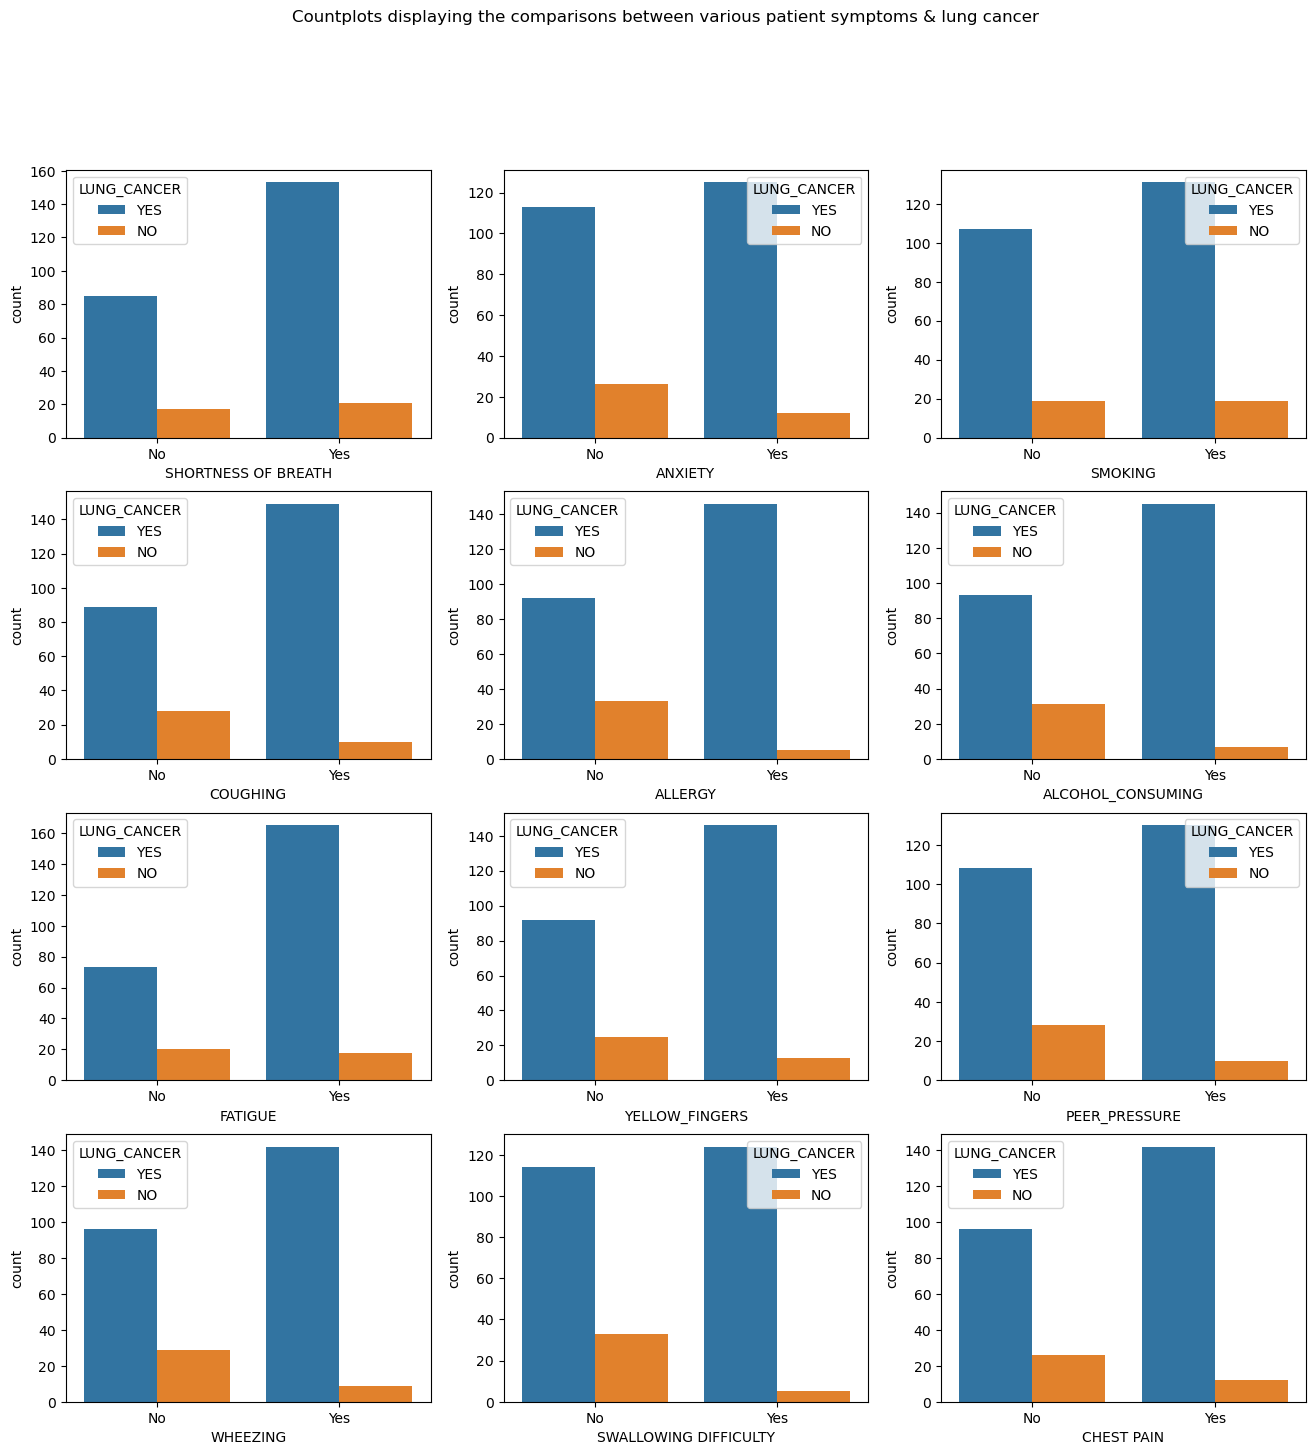

In [158]:
# Create a few countplots displaying the comparisons between various patient symptoms and lung cancer
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))

# Plot onto each subplot
sns.countplot(x="SHORTNESS OF BREATH", data=df, hue = "LUNG_CANCER", ax = axes[0,0])
sns.countplot(x="ANXIETY", data=df, hue = "LUNG_CANCER", ax = axes[0,1])
sns.countplot(x="SMOKING", data=df, hue = "LUNG_CANCER", ax = axes[0,2])
sns.countplot(x="COUGHING", data=df, hue = "LUNG_CANCER", ax = axes[1,0])
sns.countplot(x="ALLERGY", data=df, hue = "LUNG_CANCER", ax = axes[1,1])
sns.countplot(x="ALCOHOL_CONSUMING", data=df, hue = "LUNG_CANCER", ax = axes[1,2])
sns.countplot(x="FATIGUE", data=df, hue = "LUNG_CANCER", ax = axes[2,0])
sns.countplot(x="YELLOW_FINGERS", data=df, hue = "LUNG_CANCER", ax = axes[2,1])
sns.countplot(x="PEER_PRESSURE", data=df, hue = "LUNG_CANCER", ax = axes[2,2])
sns.countplot(x="WHEEZING", data=df, hue = "LUNG_CANCER", ax = axes[3,0])
sns.countplot(x="SWALLOWING DIFFICULTY", data=df, hue = "LUNG_CANCER", ax = axes[3,1])
sns.countplot(x="CHEST PAIN", data=df, hue = "LUNG_CANCER", ax = axes[3,2])



# Add a title to the figure
fig.suptitle("Countplots displaying the comparisons between various patient symptoms & lung cancer")

# Display the plot
plt.show()

Interpretation of these plots

Plot #1: It is a count plot that displays the number of patients [cancer/non-cancer patients] who exhibit the symptom of "Shortness of breath". From this plot, we can observe that among all the patients who are diagonesed with lung cancer, majority of them exhibit this particular symptom. 

Plot #2: It is a count plot that displays the anxiety levels for all patients [cancer/non-cancer patients]. From this plot, we can see that among all the patients who are diagnosed with lung cancer, majority of them exhibit this symptom. 

Plot #3: It is a count plot that displays the number of patients [cancer/non-cancer patients] who smoke. From this plot, it can be seen that among all the patients who are diagnosed with lung cancer, majority of them tend to smoke. We can infer that smoking could be one of the factors that could contribute to the development of lung cancer. 

Plot #4: It is a count plot that displays the number of patients [cancer/non-cancer patients] who tend to consume alcohol. From this plot, one can infer that among all the cancer patients, majority of them tend to consume alcohol. 

Plot #5: It is a count plot that displays the number of patients [cancer/non-cancer patients] who tend to exhibit allergies. From this particular plot, one can understand that among all the patients who are diagnosed with lung cancer, majority of them exhibit such symptoms. 

Plot #6: It is a count plot that displays the number of patients [cancer/non-cancer patients] who experience severe coughing. From this particular plot, one can understand that among all the patients who are diagnosed with lung cancer, majority of them exhibit such symptoms. 

Plot #7: It is a count plot that displays the number of patients [cancer/non-cancer patients] who experience peer pressure. From this particular plot, one can understand that among all the patients who are diagnosed with lung cancer, majority of them exhibit such symptoms. 

Plot #8: It is a count plot that displays the number of patients [cancer/non-cancer patients] who experience yellow fingers. From this particular plot, one can understand that among all the patients who are diagnosed with lung cancer, majority of them exhibit such symptoms. 

Plot #9: It is a count plot that displays the number of patients [cancer/non-cancer patients] who experience fatigue. From this particular plot, one can understand that among all the patients who are diagnosed with lung cancer, majority of them exhibit such symptoms. 

Plot #10: It is a count plot that displays the number of patients [cancer/non-cancer patients] who experience chest pain. From this particular plot, one can understand that among all the patients who are diagnosed with lung cancer, majority of them exhibit such symptoms. 

Plot #11: It is a count plot that displays the number of patients [cancer/non-cancer patients] who experience swallowing difficulty. From this particular plot, one can understand that among all the patients who are diagnosed with lung cancer, majority of them exhibit such symptoms. 

Plot #12: It is a count plot that displays the number of patients [cancer/non-cancer patients] who experience wheezing. From this particular plot, one can understand that among all the patients who are diagnosed with lung cancer, majority of them exhibit such symptoms. 

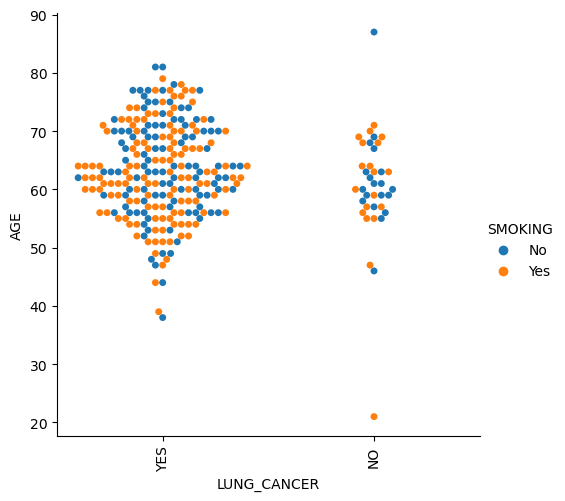

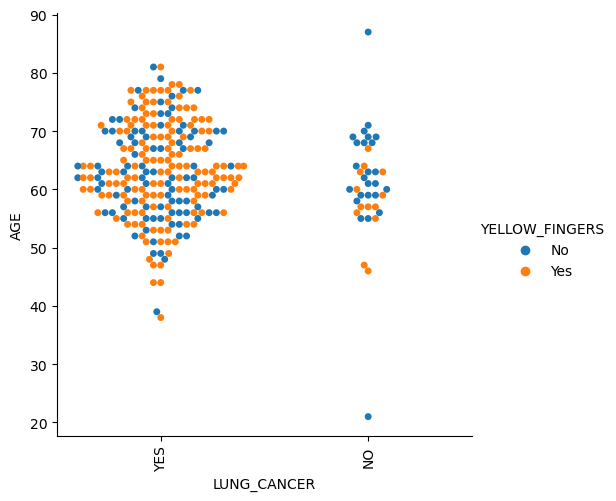

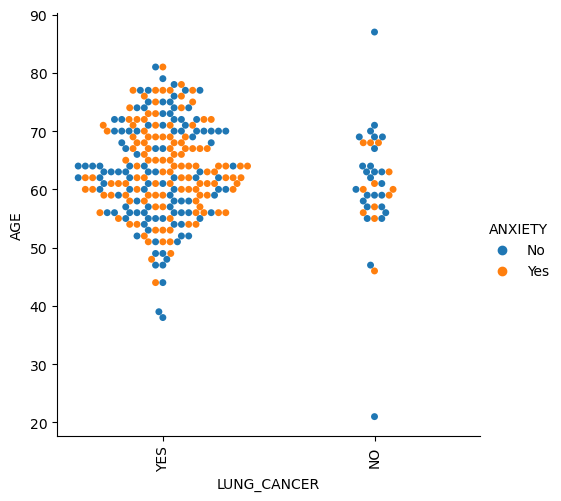

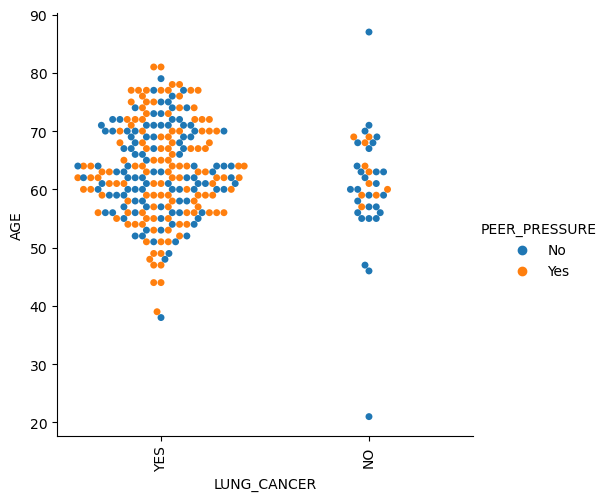

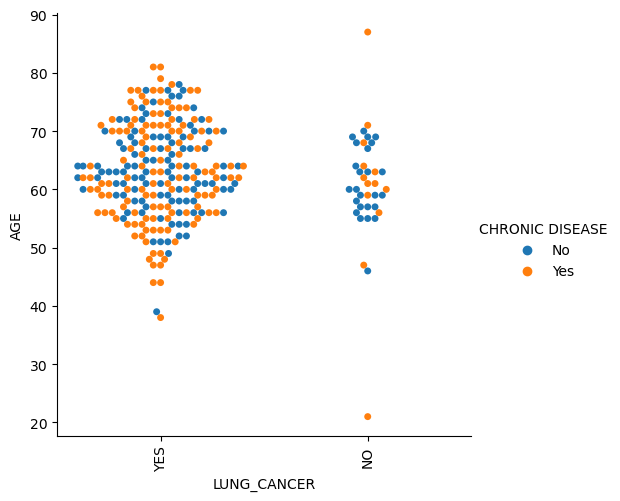

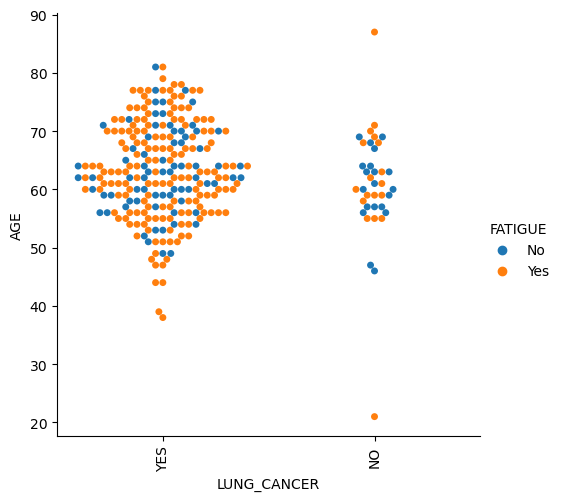

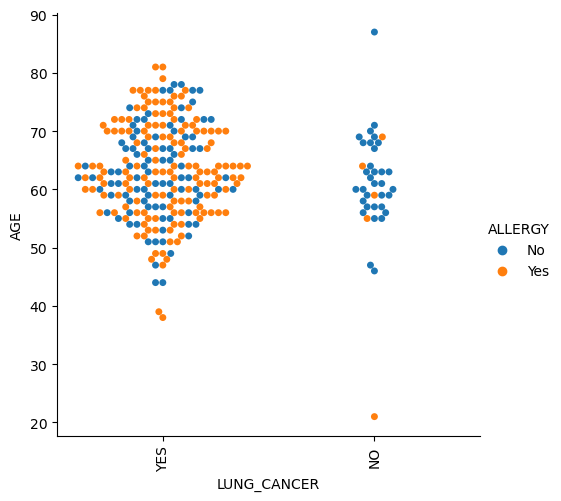

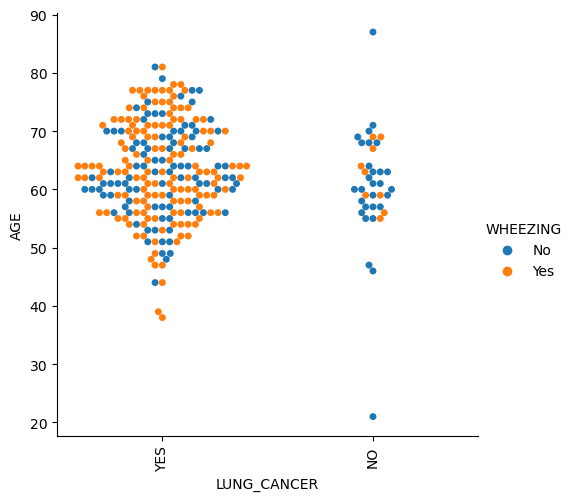

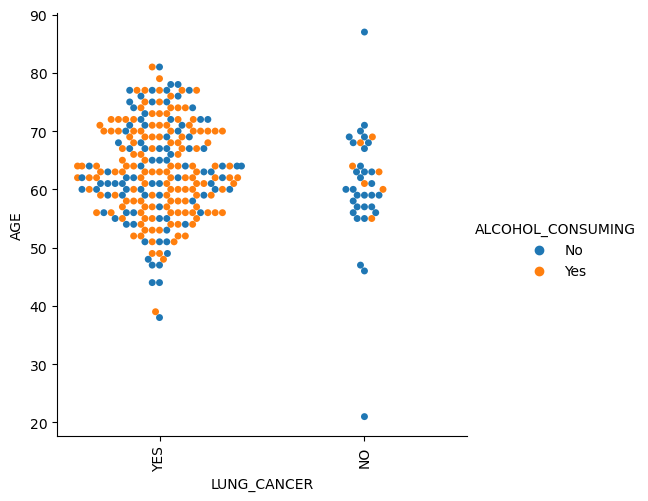

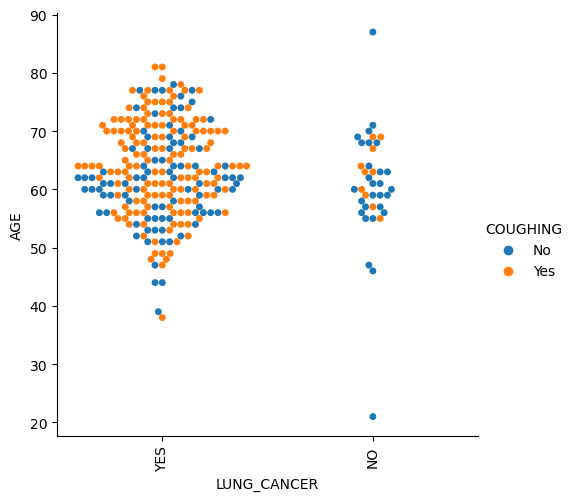

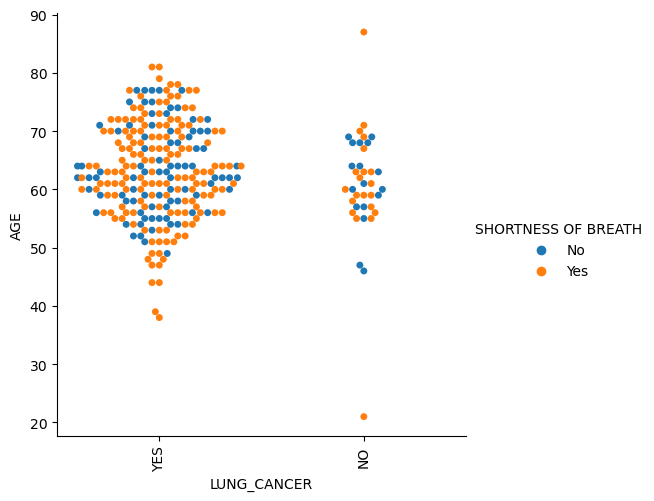

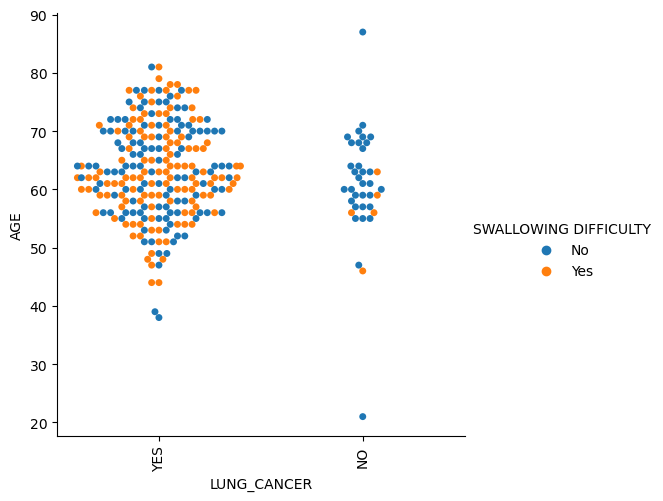

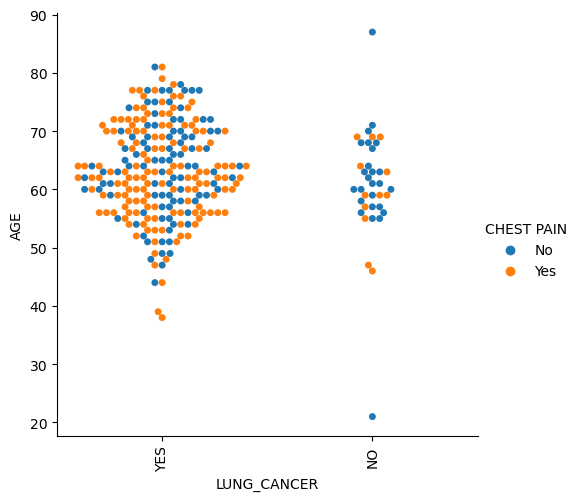

In [50]:
# Create a catplot with x-axis set as lung cancer & y-axis as age and the other attributes such as smoking, yellow_fingers as categories
# A catplot is a type of categorical plot in the seaborn data visualization library that can be used to show the distribution of a categorical variable across one or more other categorical variables. It is particularly useful for visualizing the relationship between categorical variables and continuous variables.
# This can help you gain insights into which one of these categorical variables are strongly associated with lung cancer and which are not.
col=[ 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for i in col:
    sns.catplot(x="LUNG_CANCER", y="AGE", hue=i,kind="swarm",data=df)
    plt.xticks(rotation=90)
    plt.show()

In [113]:
# Let's create a new dataframe containing only positive cases data.
positive_cases = df.loc[df['LUNG_CANCER'] == "YES"]
positive_cases.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


In [114]:
# Split the above dataframes into 2 separate ones. One that contains the positive cases only for male patients and the other one only for female patients
positive_male_cases = df.loc[(df['LUNG_CANCER'] == "YES") & (df['GENDER'] == "Male")]
positive_female_cases = df.loc[(df['LUNG_CANCER'] == "YES") & (df['GENDER'] == "Female")]


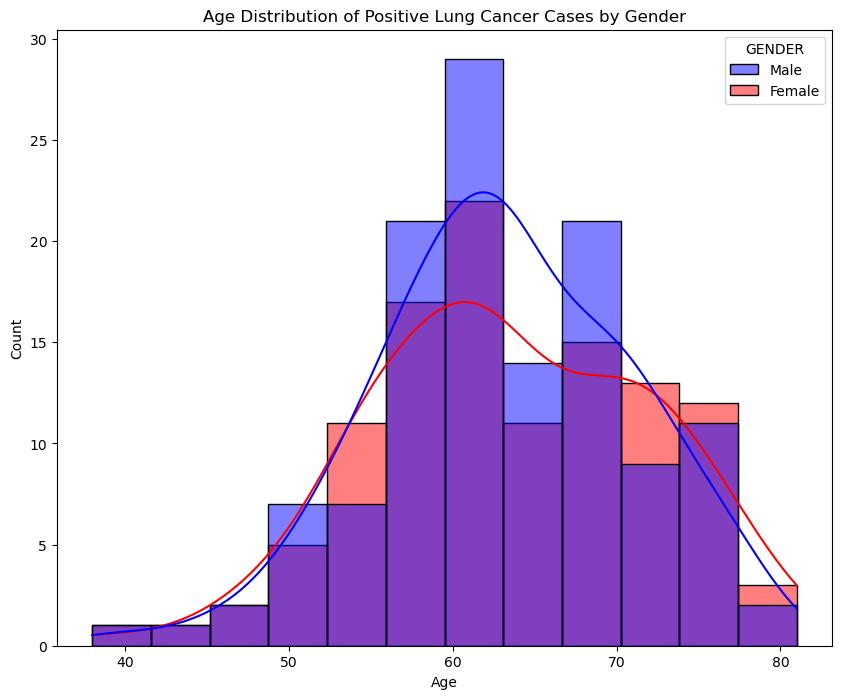

In [67]:
# create a combination plot using seaborn that displays the age distribution of the positive lung cancer by gender

plt.figure(figsize = (10, 8))
custom_palette = {'Male': 'blue', 'Female': 'red'}
sns.histplot(data=positive_cases, x='AGE', hue='GENDER', kde=True, palette= custom_palette)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Positive Lung Cancer Cases by Gender')

# display the plot
plt.show()

From the combination plot above in the case of male cancer patients, the positive cases seem to be the highest for patients between the ages of 60 & 70 years and in the case of female cancer patients, the positive cases seem to be the highest for patients between the ages of 55 & 65 years.

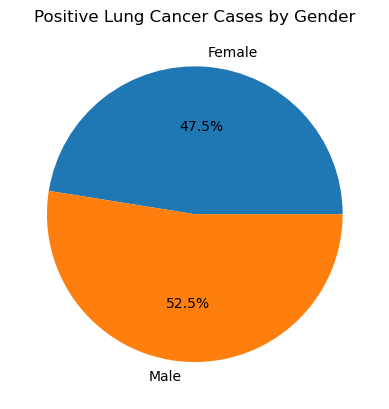

In [159]:
# group the positive cases by gender and count the number of cases for each gender
cases_by_gender = positive_cases.groupby('GENDER')['LUNG_CANCER'].count()

# create a pie chart
plt.pie(cases_by_gender, labels=cases_by_gender.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Positive Lung Cancer Cases by Gender')

# display the chart
plt.show()

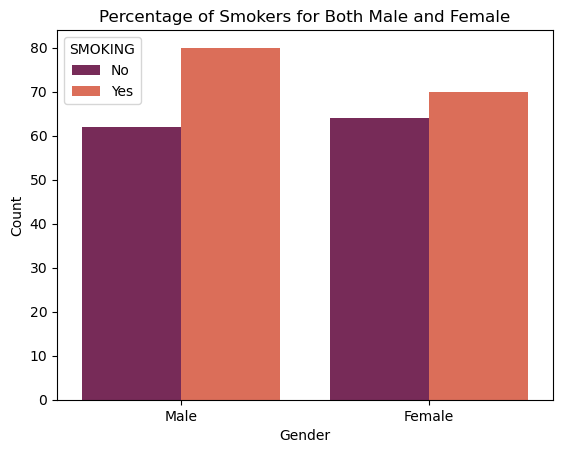

In [160]:
# filter the data to only include male and female
male_female_data = df.loc[df['GENDER'].isin(['Male', 'Female'])]

# create the countplot
sns.countplot(x='GENDER', hue='SMOKING', data=male_female_data, palette='rocket')

# set the labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Percentage of Smokers for Both Male and Female')

# display the plot
plt.show()

We can see that the percentage of men smokers is much higher than the percentage of female smokers.

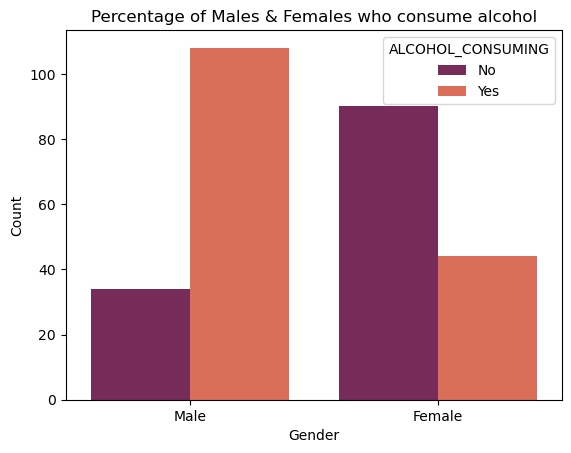

In [161]:
# filter the data to only include male and female
male_female_data = df.loc[df['GENDER'].isin(['Male', 'Female'])]

# create the countplot
sns.countplot(x='GENDER', hue='ALCOHOL_CONSUMING', data=male_female_data, palette='rocket')

# set the labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Percentage of Males & Females who consume alcohol')

# display the plot
plt.show()

We can observe that a higher proportion of males consume alcohol as compared to females.

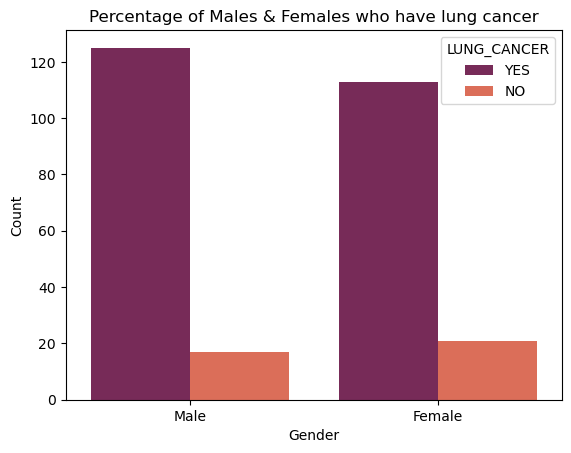

In [162]:
# filter the data to only include male and female
male_female_data = df.loc[df['GENDER'].isin(['Male', 'Female'])]

# create the countplot
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=male_female_data, palette='rocket')

# set the labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Percentage of Males & Females who have lung cancer')

# display the plot
plt.show()

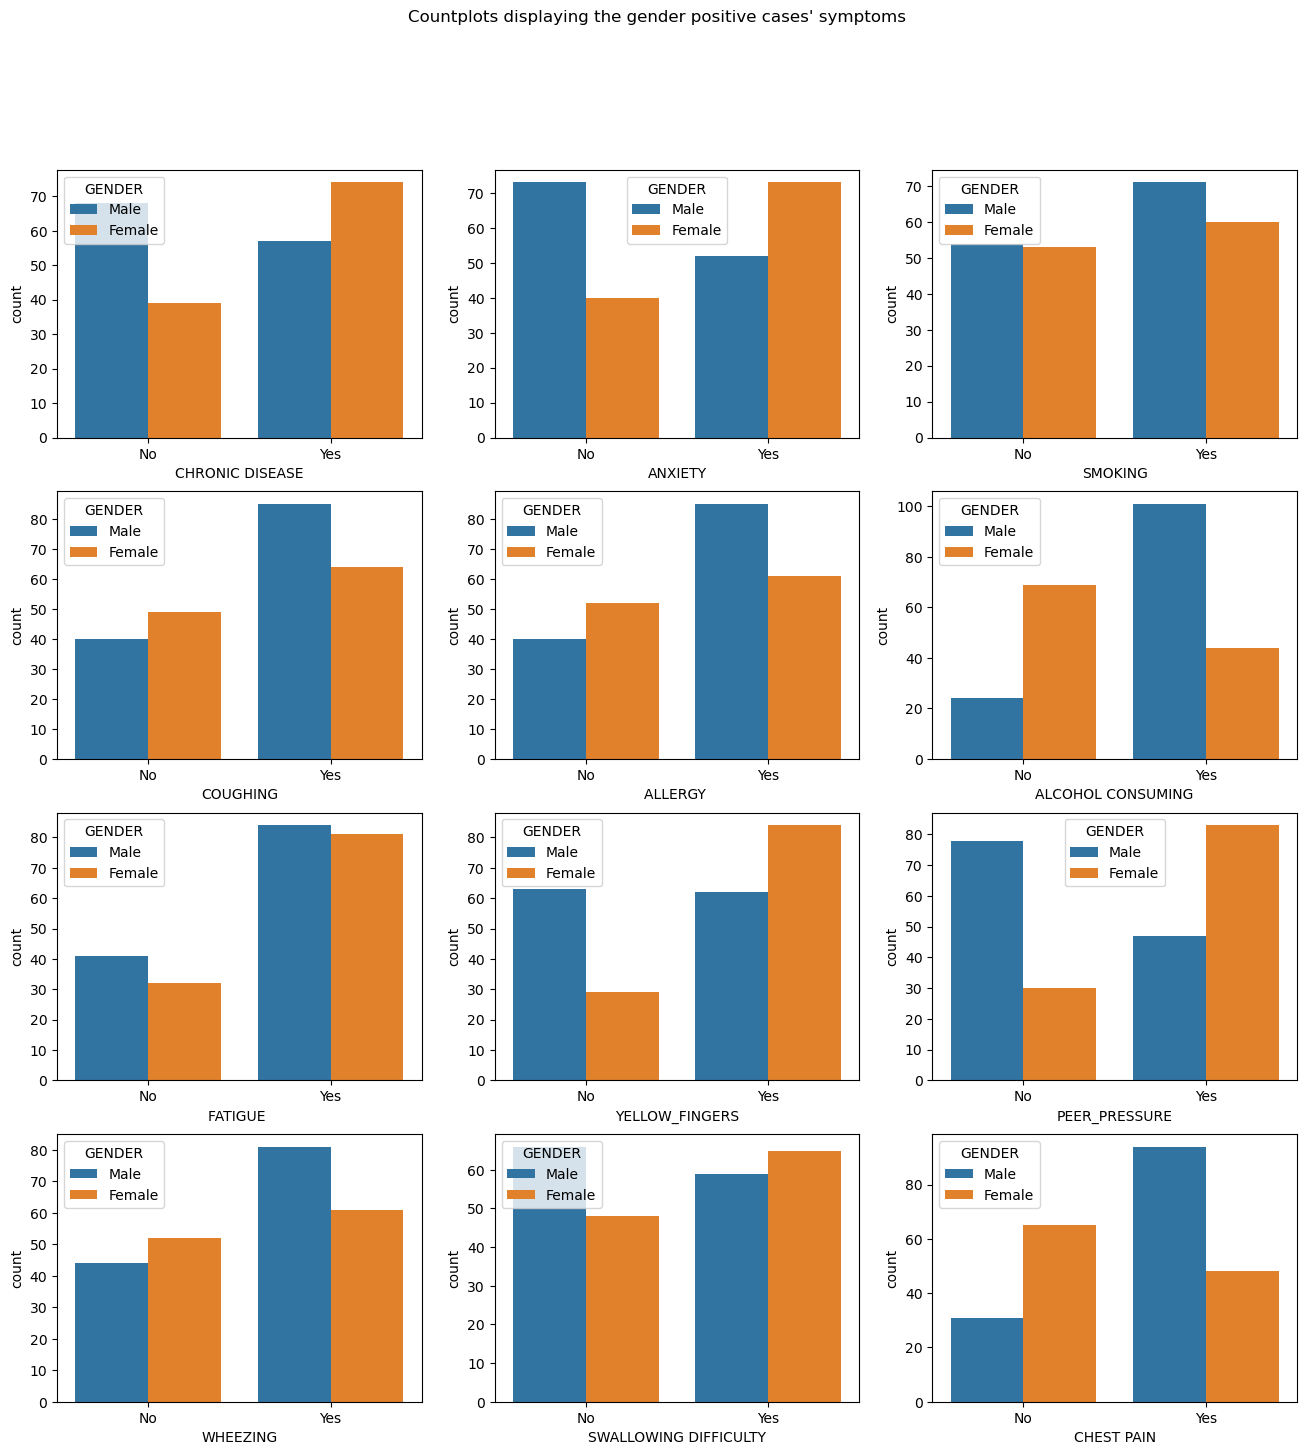

In [166]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))

# Plot onto each subplot
sns.countplot(x="CHRONIC DISEASE", data=positive_cases, hue = "GENDER", ax = axes[0,0])
sns.countplot(x="ANXIETY", data=positive_cases, hue = "GENDER", ax = axes[0,1])
sns.countplot(x="SMOKING", data=positive_cases, hue = "GENDER", ax = axes[0,2])
sns.countplot(x="COUGHING", data=positive_cases, hue = "GENDER", ax = axes[1,0])
sns.countplot(x="ALLERGY ", data=positive_cases, hue = "GENDER", ax = axes[1,1])
sns.countplot(x="ALCOHOL CONSUMING", data=positive_cases, hue = "GENDER", ax = axes[1,2])
sns.countplot(x="FATIGUE ", data=positive_cases, hue = "GENDER", ax = axes[2,0])
sns.countplot(x="YELLOW_FINGERS", data=positive_cases, hue = "GENDER", ax = axes[2,1])
sns.countplot(x="PEER_PRESSURE", data=positive_cases, hue = "GENDER", ax = axes[2,2])
sns.countplot(x="WHEEZING", data=positive_cases, hue = "GENDER", ax = axes[3,0])
sns.countplot(x="SWALLOWING DIFFICULTY", data=positive_cases, hue = "GENDER", ax = axes[3,1])
sns.countplot(x="CHEST PAIN", data=positive_cases, hue = "GENDER", ax = axes[3,2])



# Add a title to the figure
fig.suptitle("Countplots displaying the gender positive cases' symptoms")

# Display the plot
plt.show()

Interpretation of some of these plots

Plot #1: This count plot tells us among all the patients who were diagnosed with lung cancer, majority of them who exhibited this symptom of "Chronic disease" were female patients.

Plot #2: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who had high anxiety levels were female patients. 

Plot #3: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who smoked were male patients. 

Plot #4: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who consumed alcohol were male patients. 

Plot #5: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who exhibited allergies were male patients. 

Plot #6: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who were experiencing severe coughing were male patients. 

Plot #7: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who were experiencing severe peer pressure were female patients. 

Plot #8: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who were experiencing the symptom of "Yellow_Fingers" were female patients.

Plot #9: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who were experiencing the symptom of "Fatigue" were male patients.

Plot #10: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who were experiencing chest pain were male patients. 

Plot #11: This count plot tells us that among all the patients who were diagnosed with lung cancer, majority of them who were experiencing swallowing difficulty were female patients.

Plot #12: This count plot tells us that among all the patients who were diagnose with lung cancer, majority of them who were experiencing wheezing were male patients.

In [167]:
# Convert the gender column from categorical to numerical data type using One Hot Encoder for avoiding unexpected gender bias
from sklearn.preprocessing import OneHotEncoder

# create an instance of the OneHotEncoder class
encoder = OneHotEncoder(sparse=False)

# fit the encoder on the "GENDER" column and transform it
gender_encoded = encoder.fit_transform(df[["GENDER"]])

# create a new DataFrame with the encoded "GENDER" column
gender_df = pd.DataFrame(gender_encoded, columns=["GENDER_FEMALE", "GENDER_MALE"])

# concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, gender_df], axis=1)

# drop the original "GENDER" column
df.drop(["GENDER"], axis=1, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [168]:
# Convert the other attributes from categorical to numerical data type using label encoder
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the 'SMOKING' attribute
df['SMOKING'] = le.fit_transform(df['SMOKING'])

# fit and transform the 'ALCOHOL CONSUMING' attribute
df['ALCOHOL_CONSUMING'] = le.fit_transform(df['ALCOHOL_CONSUMING'])

# fit and transform the 'YELLOW_FINGERS' attribute
df['YELLOW_FINGERS'] = le.fit_transform(df['YELLOW_FINGERS'])

# fit and transform the 'ALLERGY' attribute
df['ALLERGY'] = le.fit_transform(df['ALLERGY'])

# fit and transform the 'FATIGUE' attribute
df['FATIGUE'] = le.fit_transform(df['FATIGUE'])

# fit and transform the 'COUGHING' attribute
df['COUGHING'] = le.fit_transform(df['COUGHING'])

# fit and transform the 'WHEEZING' attribute
df['WHEEZING'] = le.fit_transform(df['WHEEZING'])

# fit and transform the 'CHRONIC DISEASE' attribute
df['CHRONIC DISEASE'] = le.fit_transform(df['CHRONIC DISEASE'])

# fit and transform the 'CHEST PAIN' attribute
df['CHEST PAIN'] = le.fit_transform(df['CHEST PAIN'])

# fit and transform the 'SWALLOWING DIFFICULTY' attribute
df['SWALLOWING DIFFICULTY'] = le.fit_transform(df['SWALLOWING DIFFICULTY'])

# fit and transform the 'SHORTNESS OF BREATH' attribute
df['SHORTNESS OF BREATH'] = le.fit_transform(df['SHORTNESS OF BREATH'])

# fit and transform the 'LUNG_CANCER' attribute
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

# fit and transform the 'Anxiety' attribute
df['ANXIETY'] = le.fit_transform(df['ANXIETY'])

# fit and transform the 'PEER_PRESSURE' attribute
df['PEER_PRESSURE'] = le.fit_transform(df['PEER_PRESSURE'])




In [169]:
# Obtain the first 5 rows of this dataframe after transforming all the categorical attributes
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_FEMALE,GENDER_MALE
0,69.0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0.0,1.0
1,74.0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0.0,1.0
2,59.0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1.0,0.0
3,63.0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0.0,1.0
4,63.0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1.0,0.0


In [170]:
# Create a correlation matrix that displays the correlation coefficients
corr_matrix = df.corr()
corr_matrix

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_FEMALE,GENDER_MALE
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305,-0.026668,0.026668
SMOKING,-0.073410,1.000000,0.175001,0.321449,0.173017,0.075852,0.158286,0.169491,0.075246,0.150984,0.079835,0.231378,0.235522,0.279343,0.240938,0.004601,-0.004601
YELLOW_FINGERS,0.025773,0.175001,1.000000,0.644905,0.447024,0.206013,0.105672,0.072579,0.144026,-0.030053,0.206402,0.097811,0.466237,0.110471,0.360001,0.006195,-0.006195
ANXIETY,0.050605,0.321449,0.644905,1.000000,0.369702,0.194893,0.046888,0.070396,0.058725,0.075860,0.020292,0.068257,0.586416,0.098544,0.331101,0.014988,-0.014988
PEER_PRESSURE,0.037848,0.173017,0.447024,0.369702,1.000000,0.233640,0.268588,0.143395,0.166773,0.090314,0.140142,0.019800,0.465753,0.136272,0.369713,0.061922,-0.061922
CHRONIC DISEASE,-0.003431,0.075852,0.206013,0.194893,0.233640,1.000000,0.110340,0.303718,0.163083,0.203574,0.064004,0.181748,0.258180,0.155509,0.328180,0.029740,-0.029740
FATIGUE,0.021606,0.158286,0.105672,0.046888,0.268588,0.110340,1.000000,0.187171,0.312099,0.041041,0.307510,0.516364,0.103596,0.199047,0.334358,0.046148,-0.046148
ALLERGY,0.037139,0.169491,0.072579,0.070396,0.143395,0.303718,0.187171,1.000000,0.327825,0.498306,0.358367,0.174528,0.171593,0.390862,0.475237,-0.127561,0.127561
WHEEZING,0.052803,0.075246,0.144026,0.058725,0.166773,0.163083,0.312099,0.327825,1.000000,0.403866,0.477445,0.223434,0.288039,0.308040,0.408865,-0.054526,0.054526
ALCOHOL_CONSUMING,0.052049,0.150984,-0.030053,0.075860,0.090314,0.203574,0.041041,0.498306,0.403866,1.000000,0.351401,0.056370,0.200794,0.443408,0.444275,-0.200617,0.200617


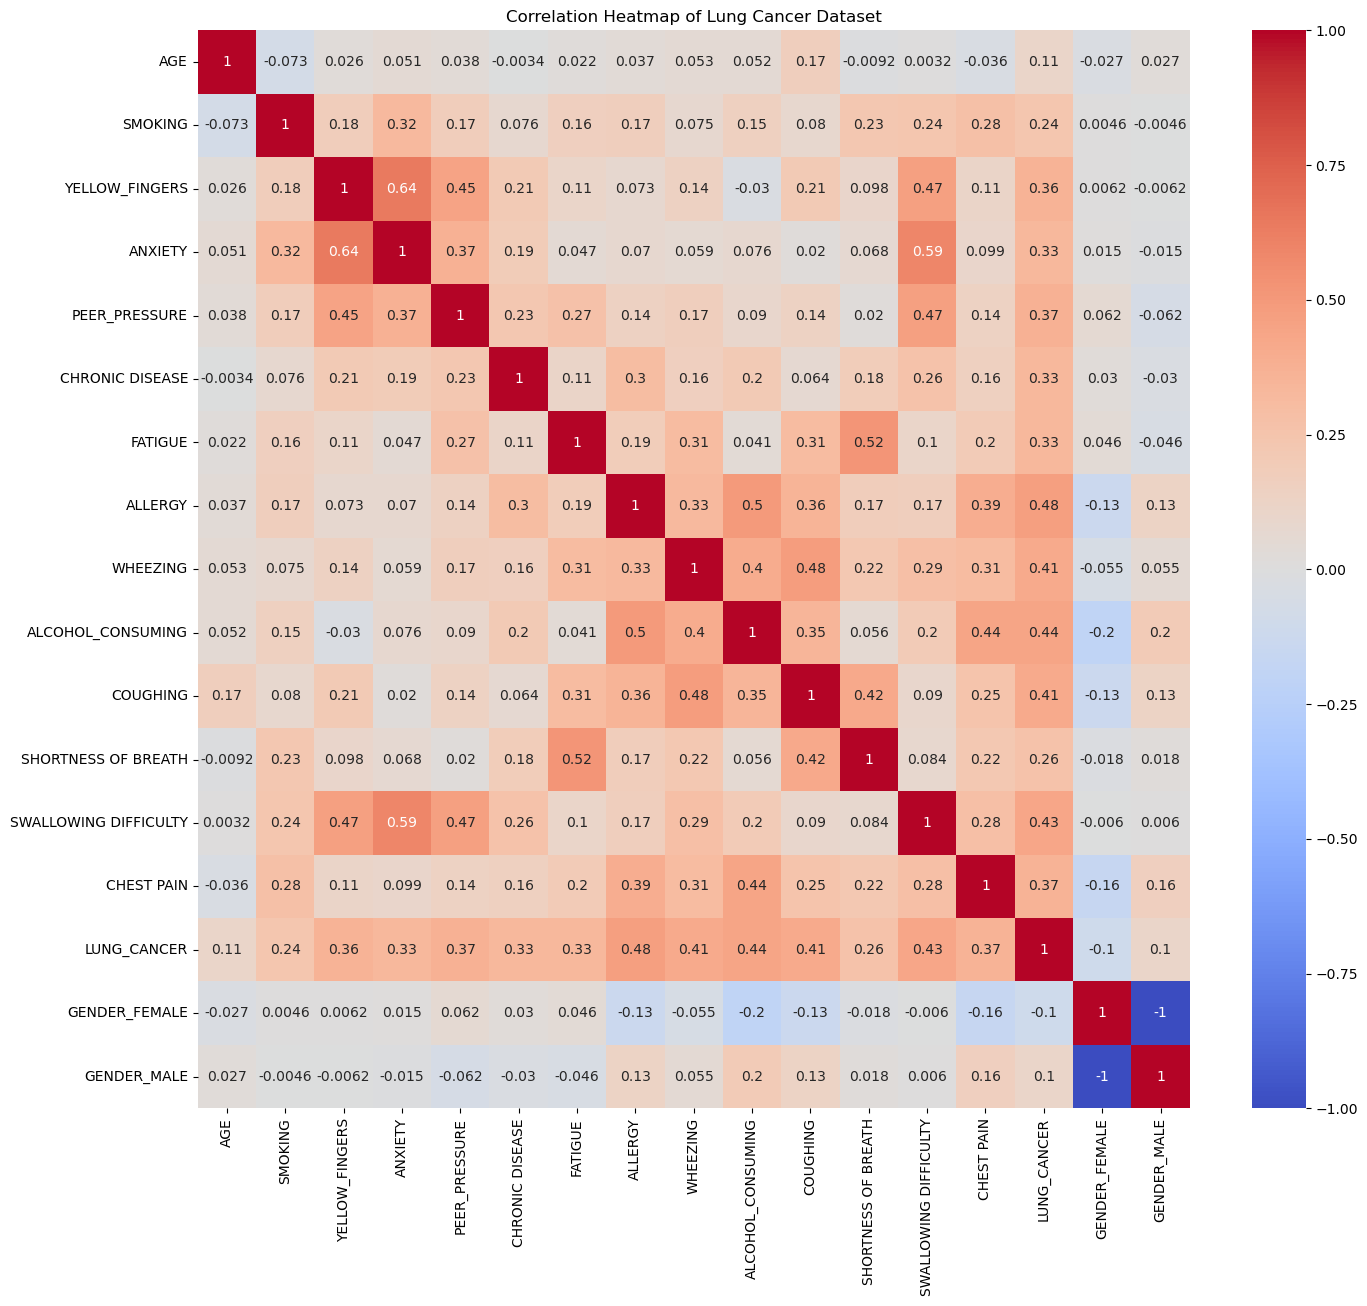

In [171]:
# Create a correlation heatmap that displays the correlation coefficients
# Correlation heatmap: A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It’s like a color chart that shows us how closely related different variables are. In a correlation heatmap, each variable is represented by a row and a column, and the cells show the correlation between them1.

# It is useful for visualizing data because it allows you to inspect the dataset easily and understand the relationship between variables. Some models perform worse when they use variables that are highly correlated with others2. Correlation heatmaps are important because it helps identify which variables may potentially result in multicolinearity, which would compromise the integrity of the model3.
plt.figure(figsize = (16, 14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Lung Cancer Dataset')
plt.show()


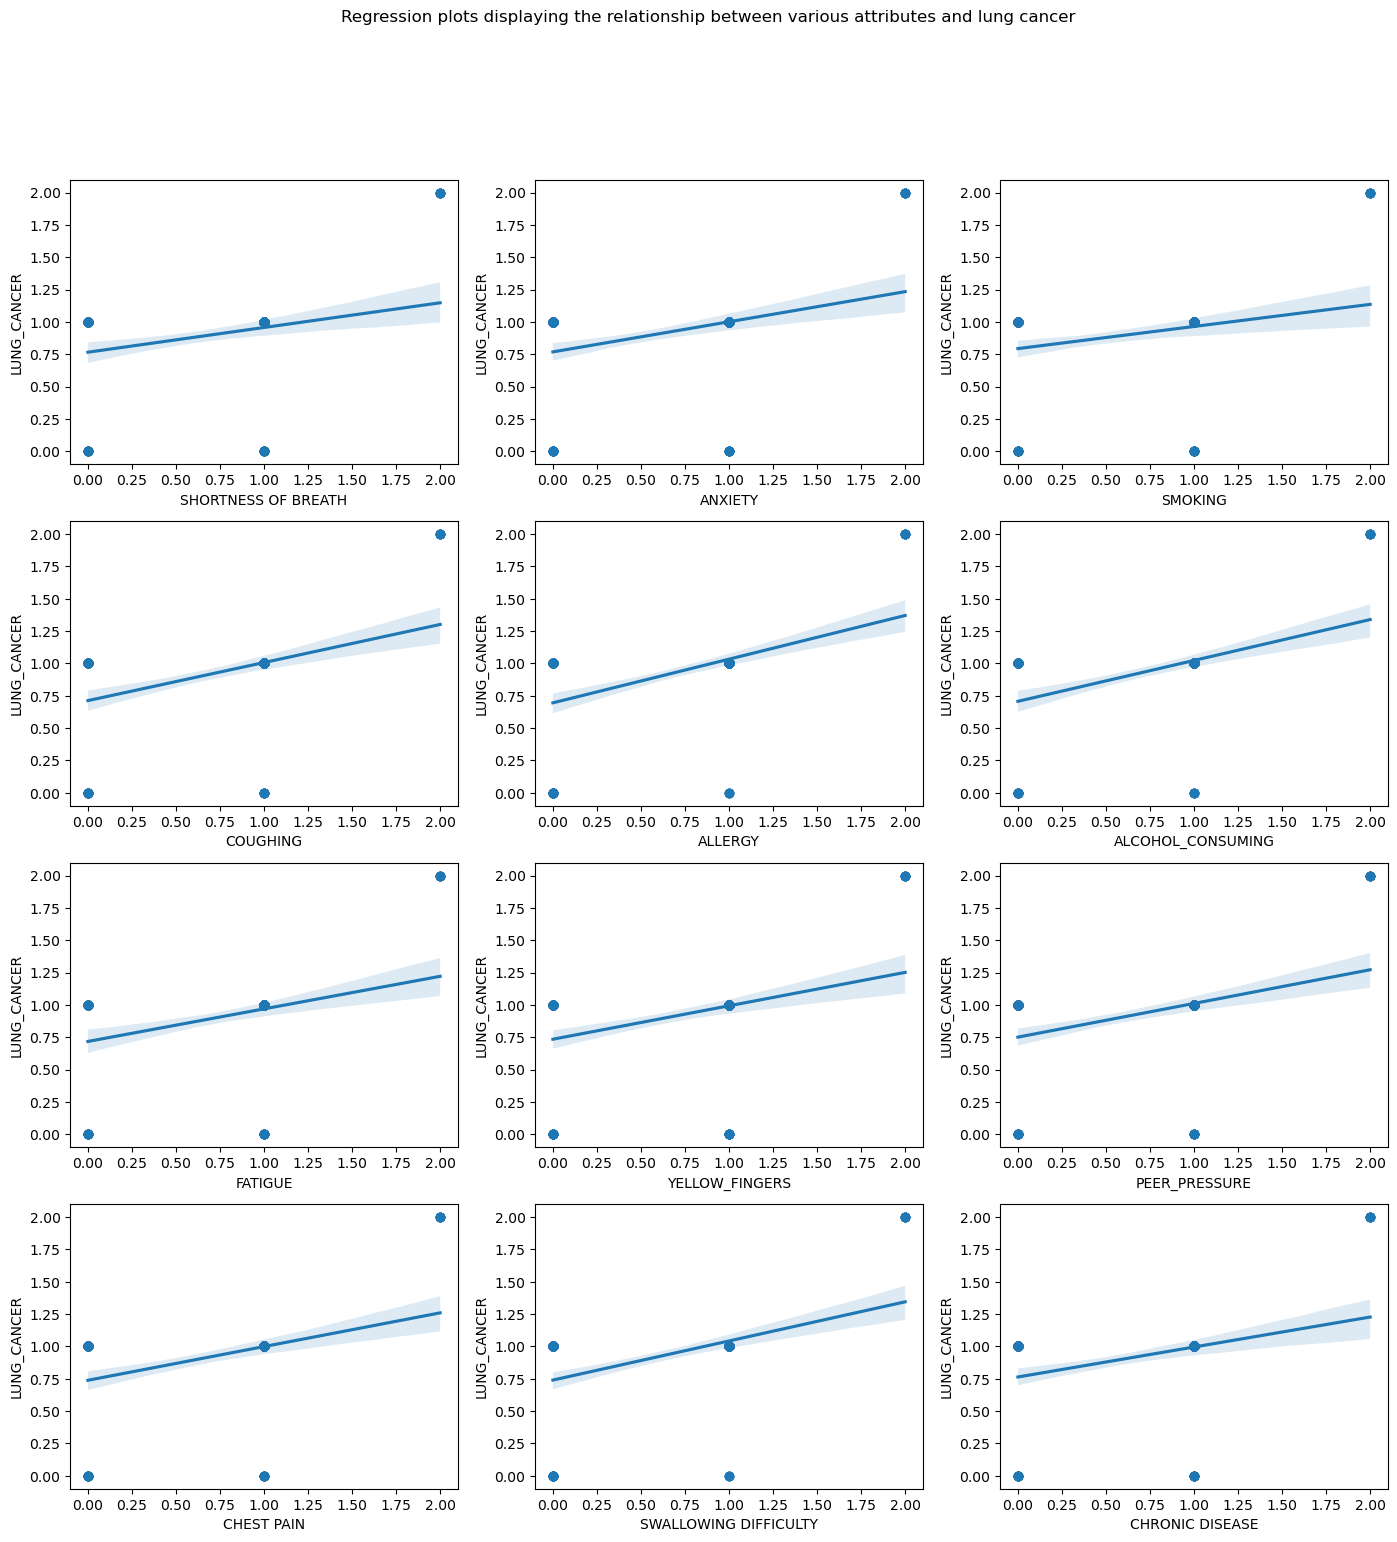

In [65]:
# Create a few regression plots that displays the relationship between these independent variables and the target variable "LUNG_CANCER"
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(17, 17))

# Plot onto each subplot
sns.regplot(x="SHORTNESS OF BREATH", y = "LUNG_CANCER", data=df, ax = axes[0,0])
sns.regplot(x="ANXIETY", y = "LUNG_CANCER", data=df, ax = axes[0,1])
sns.regplot(x="SMOKING", y = "LUNG_CANCER" ,data=df, ax = axes[0,2])
sns.regplot(x="COUGHING", y = "LUNG_CANCER", data=df, ax = axes[1,0])
sns.regplot(x="ALLERGY", y= "LUNG_CANCER", data=df, ax = axes[1,1])
sns.regplot(x="ALCOHOL_CONSUMING", y = "LUNG_CANCER",  data=df, ax = axes[1,2])
sns.regplot(x="FATIGUE", y = "LUNG_CANCER",  data=df, ax = axes[2,0])
sns.regplot(x="YELLOW_FINGERS", y = "LUNG_CANCER", data=df, ax = axes[2,1])
sns.regplot(x="PEER_PRESSURE", y = "LUNG_CANCER",  data=df, ax = axes[2,2])
sns.regplot(x = "CHEST PAIN", y = "LUNG_CANCER", data = df, ax = axes[3,0])
sns.regplot(x = "SWALLOWING DIFFICULTY", y = "LUNG_CANCER", data = df, ax = axes[3,1])
sns.regplot(x = "CHRONIC DISEASE", y = "LUNG_CANCER", data = df, ax = axes[3,2])




# Add a title to the figure
fig.suptitle("Regression plots displaying the relationship between various attributes and lung cancer")

# Display the plot
plt.show()

From all the regression plots, we can see that all of these symptoms seem to have a positive impact on lung cancer. They contribute to the development of lung cancer. 

#### Interpretation of all the plots

First Plot - Displays the relationship between the shortness of breath & lung cancer. From this plot, one can understand that there is a positive relationship between the shortness of breath and lung cancer. A positive relationship between "SWALLOWING_DIFFICULTY" and "LUNG_CANCER" suggests that people who experience difficulty in swallowing are more likely to develop lung cancer. This relationship could be due to several factors, such as the inhalation of harmful substances while smoking or exposure to environmental toxins. However, the positive relationship can be used to identify individuals who may be at higher risk of developing lung cancer and take preventative measures.

Second Plot - Displays the positive relationship between "ANXIETY" & "LUNG_CANCER". The positive relationship between these 2 variables suggests that the individuals with levels of anxiety are associated with a higher risk of developing lung cancer. 

Third Plot - Displays the positive relationship between "SMOKING" & "LUNG_CANCER". The positive relationship between smoking and lung cancer indicates that as the prevalence of smoking increases, so does the incidence of lung cancer. 

Fourth Plot - Displays the positive relationship between "COUGHING" & "LUNG_CANCER". This could be the case because chronic coughing may be associated with an increased risk of lung cancer. This is likely due to the fact that coughing is often a symptom of chronic bronchitis, which are considered to be risk factors for lung cancer. Additionally, coughing can lead to inflammation and damage to the lungs over time, which can also increase the risk of developing lung cancer. 

Fifth Plot - Displays the relationship between "ALLERGY" & "LUNG_CANCER". The positive relationship between "ALLERGY" and "LUNG_CANCER" in the lung cancer dataset suggests that there may be a correlation between the two variables. It is possible that other factors, such as smoking or environmental pollutants, could be contributing to both allergies and lung cancer.

Sixth Plot - Displays the positive relationship between "ALCOHOL_CONSUMING" & "LUNG_CANCER". This positive relationship suggests that there may be a higher risk of developing lung cancer for individuals who consume alcohol.

Seventh Plot - Displays the positive relationship between "FATIGUE" & "LUNG_CANCER". This suggests that individuals with higher levels of fatigue are associated with a higher risk of developing lung cancer. 

Eighth Plot - Displays the positive relationship between "YELLOW_FINGERS" & "LUNG_CANCER". This suggests that the individuals who experience symptom of yellow fingers are associated with a higher risk of developing lung cancer.

Ninth Plot - Displays the positive relationship between "PEER_PRESSURE" & "LUNG_CANCER". One possible interpretation of a positive relationship between "PEER_PRESSURE" & "LUNG_CANCER" could be that individuals who are more susceptible to peer pressure may be more likely to engage in behaviours that increase their risk of lung cancer, such as smoking. Peer pressure may also influence an indivudal's decision to seek medical care or to adhere to a treatment plan, which could impact their overall health outcomes.

Tenth Plot - Displays the positive relationship between "CHEST_PAIN" & "LUNG_CANCER". A positive relationship between "CHEST_PAIN" and "LUNG_CANCER" means that as the value of "CHEST_PAIN" increases, the value of "LUNG_CANCER" also tends to increase. In other words, there is a direct or positive correlation between these two attributes. This could mean that "CHEST_PAIN" is a potential predictor of "LUNG_CANCER" and that individuals who experience chest pain may be at a higher risk of developing lung cancer. 

Eleventh Plot - Displays the relationship between "SWALLOWING_DIFFCULTY" & "LUNG_CANCER". A positive relationship between two variables indicates that when the value of one variable increases, the value of the other variable also increases. In this case, the regression plot shows a positive relationship between "SWALLOWING_DIFFICULTY" and "LUNG_CANCER". This means that as the severity of "SWALLOWING_DIFFICULTY" increases, the likelihood of having "LUNG_CANCER" also increases.

To provide a simple explanation, imagine a scenario where we have two groups of people: one group with no swallowing difficulty and the other group with severe swallowing difficulty. If we plot the number of individuals in each group who have lung cancer, we would expect to see that the group with severe swallowing difficulty has a higher number of individuals with lung cancer. This is what is meant by a positive relationship between the two attributes.

In more detail, the regression plot shows the relationship between the two variables in a visual form. The x-axis represents the values of "SWALLOWING_DIFFICULTY" while the y-axis represents the values of "LUNG_CANCER". Each point on the plot represents an individual observation in the data set. The line of best fit shows the general trend in the data, indicating the direction and strength of the relationship between the two variables. In this case, the positive slope of the line indicates that as "SWALLOWING_DIFFICULTY" increases, the expected value of "LUNG_CANCER" also increases.

12th Plot - Displays the positive relationship between "CHRONIC_DISEASE" & "LUNG_CANCER". A positive relationship between the attributes "CHRONIC_DISEASE" and "LUNG_CANCER" means that as the value of "CHRONIC_DISEASE" increases, the value of "LUNG_CANCER" also tends to increase. In other words, the two attributes are positively correlated.

A simple explanation of this relationship is that individuals with chronic diseases, such as diabetes or hypertension, may have weakened immune systems or other health complications that increase their risk of developing lung cancer.

A more detailed explanation is that the positive relationship between "CHRONIC_DISEASE" and "LUNG_CANCER" may be due to common risk factors, such as smoking or exposure to environmental toxins. Chronic diseases may also lead to chronic inflammation, which has been linked to the development of cancer. 



<Figure size 1000x800 with 0 Axes>

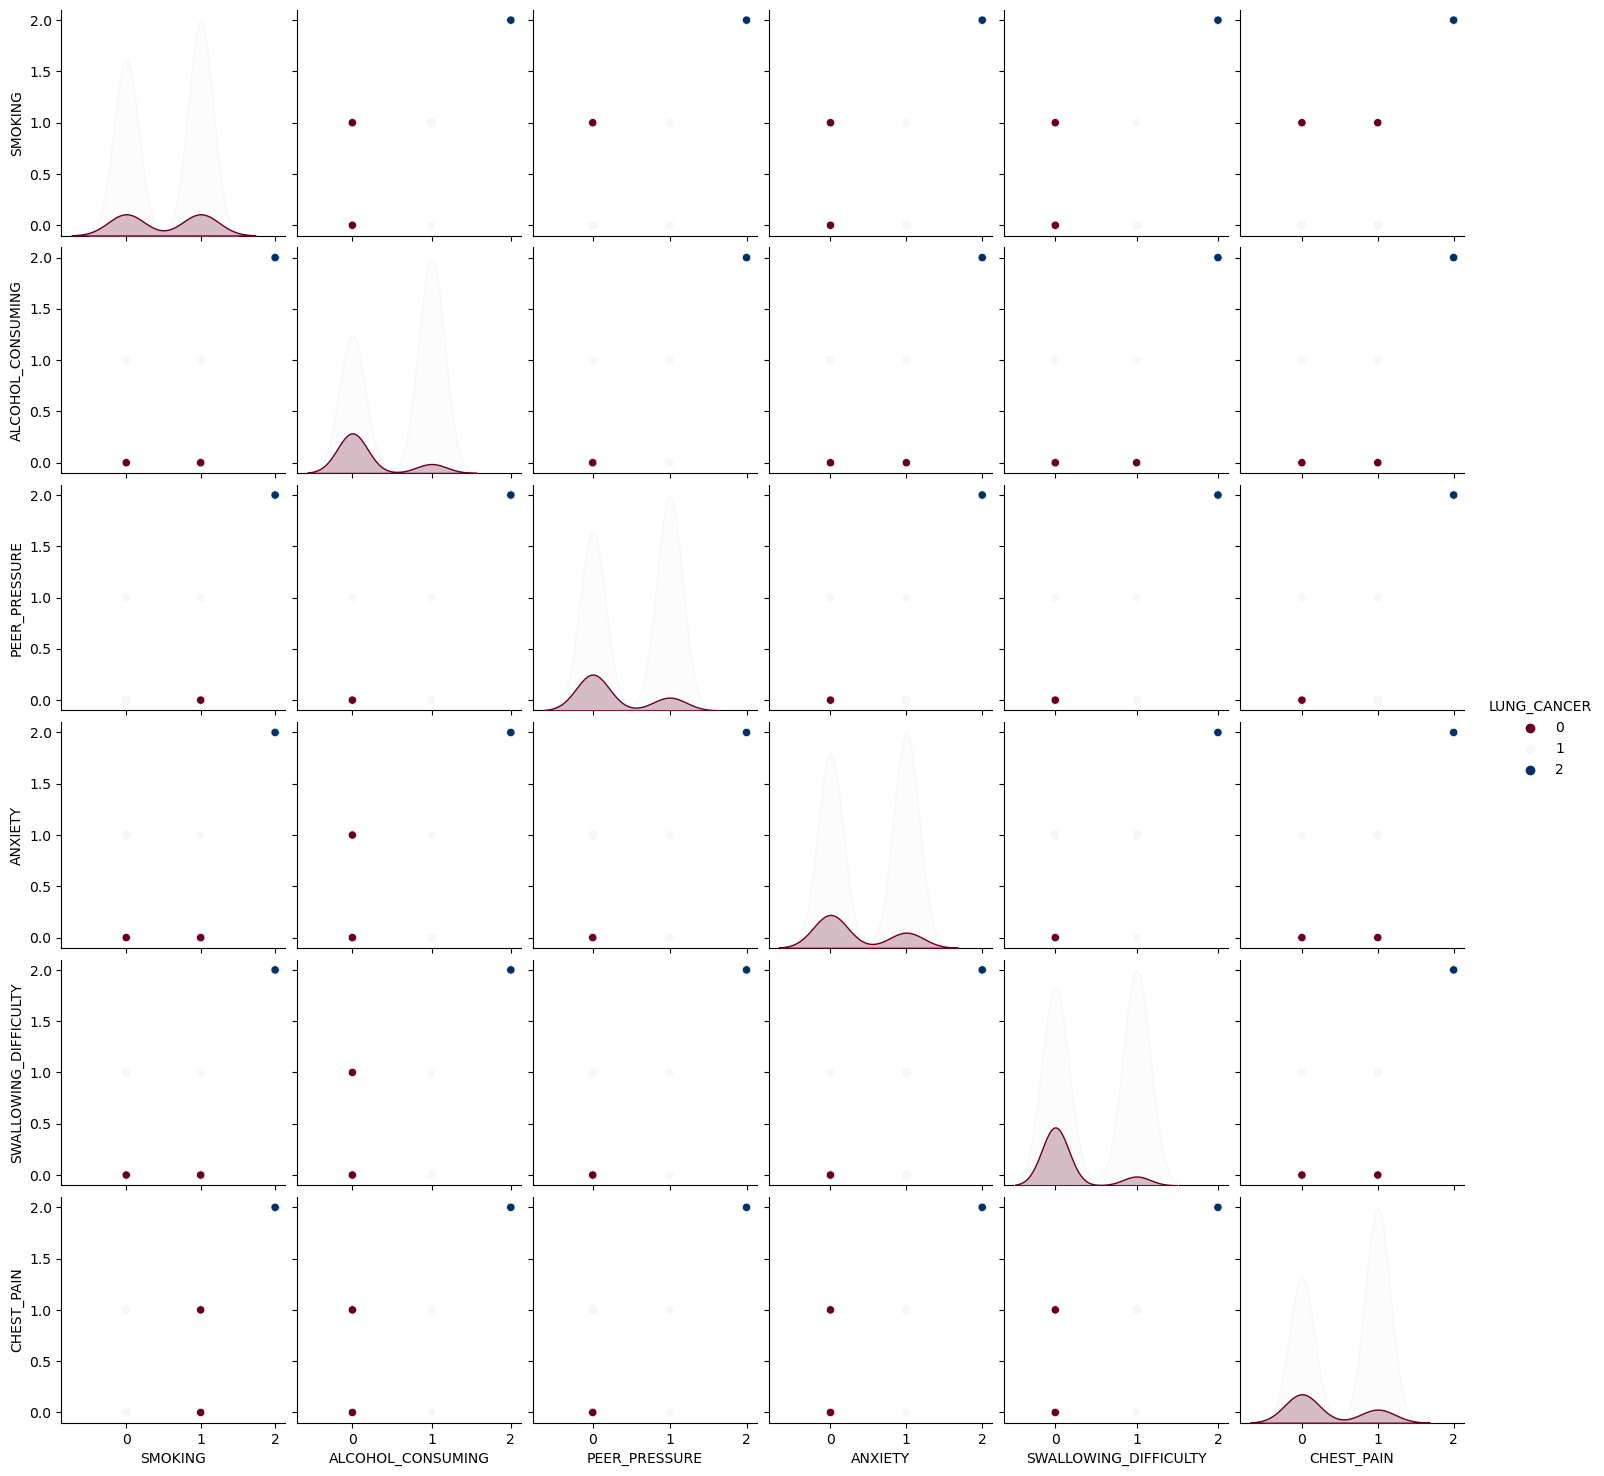

In [68]:
# Create a pairplot only for select attributes
plt.figure(figsize = (10, 8))
select_df = df.copy()[["SMOKING", "ALCOHOL_CONSUMING", "PEER_PRESSURE", "ANXIETY", "SWALLOWING_DIFFICULTY", "CHEST_PAIN", "LUNG_CANCER"]]
sns.pairplot(select_df, hue = "LUNG_CANCER", palette = "RdBu")

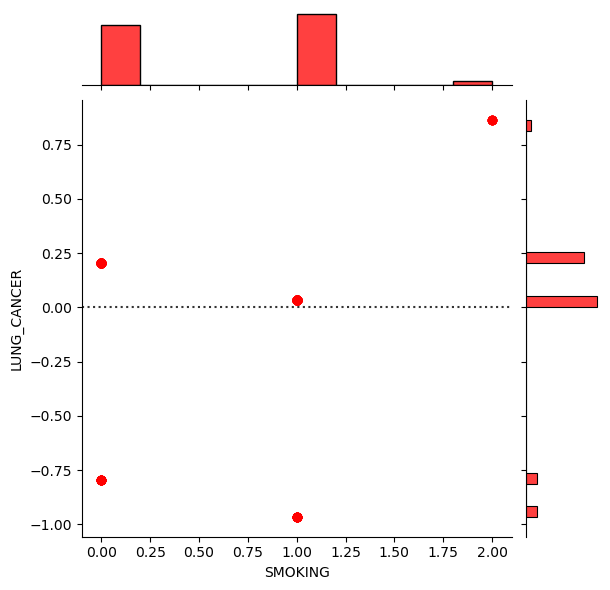

In [66]:
# Jointplot - A jointplot is a type of visualization used to show the relationship between two variables, typically through a scatterplot with marginal histograms or density plots. It is a useful tool for exploring the relationship between two continuous variables.

# You can use a jointplot to explore the relationship between any two variables, and it is particularly useful when you are interested in visualizing the joint distribution of two variables and the marginal distributions of each variable separately.

# Create a jointplot between SMOKING and LUNG_CANCER
sns.jointplot(x = "SMOKING", y = "LUNG_CANCER", data = df, kind = "resid", color = 'red');

## Linear Regression

In [307]:
# Use linear regression method to exactly know the relation between the attributes 'SMOKING' & 'LUNG_CANCER'
# create a fitted model
lm1 = smf.ols(formula='LUNG_CANCER ~ SMOKING', data = df).fit()

In [308]:
lm1.conf_int()

,0,1
Intercept,0.729723,0.859039
SMOKING,0.090290,0.251829


In [309]:
# Obtain the summary of the model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LUNG_CANCER   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     17.38
Date:                Wed, 03 May 2023   Prob (F-statistic):           4.08e-05
Time:                        18:00:58   Log-Likelihood:                -125.86
No. Observations:                 284   AIC:                             255.7
Df Residuals:                     282   BIC:                             263.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7944      0.033     24.184      0.000       0.730       0.859
SMOKING        0.1711      0.041      4.169      0.000       0.090       0.252
==============================================================================
Omnibus:                       72.152   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.116
Skew:                          -1.350   Prob(JB):                     7.54e-30
Kurtosis:                       5.010   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The coefficient on "SMOKING" in the linear regression output is 0.1711. This coefficient indicates the slope of the linear relationship between the predictor variable "SMOKING" and the response variable "LUNG_CANCER". Specifically, the coefficient suggests that for every one-unit increase in "SMOKING", we expect to see a 0.1711-unit increase in "LUNG_CANCER", holding all other variables constant.

The Multiple R-Squared value, also called the coefficient of determination, is 0.058. This value measures the proportion of variance in the response variable "LUNG_CANCER" that is explained by the predictor variable "SMOKING". In this case, the R-squared value of 0.058 suggests that only 5.8% of the variation in "LUNG_CANCER" can be explained by "SMOKING".

Finally, the p-value for "SMOKING" is 0.000, which is less than the standard significance level of 0.05. This indicates that the association between "SMOKING" and "LUNG_CANCER" is statistically significant, and we can reject the null hypothesis that the coefficient for "SMOKING" is zero. In other words, there is strong evidence that there is a non-zero linear relationship between "SMOKING" and "LUNG_CANCER".

In [310]:
# Create a linear model to interpret the relationship between "ALCOHOL_CONSUMING" & "LUNG_CANCER"
lm2 = smf.ols(formula='LUNG_CANCER ~ ALCOHOL_CONSUMING', data = df).fit()

In [311]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LUNG_CANCER   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     69.35
Date:                Wed, 03 May 2023   Prob (F-statistic):           3.62e-15
Time:                        18:07:00   Log-Likelihood:                -103.13
No. Observations:                 284   AIC:                             210.3
Df Residuals:                     282   BIC:                             217.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7074      0.031     23.155      0.000       0.647       0.768
ALCOHOL_CONSUMING     0.3161      0.038      8.328      0.000       0.241       0.391
==============================================================================
Omnibus:                       54.153   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.647
Skew:                          -1.158   Prob(JB):                     1.87e-18
Kurtosis:                       4.241   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient on "ALCOHOL_CONSUMING" means that there is a positive relationship between alcohol consumption and lung cancer. For every unit increase in alcohol consumption, there is an increase in lung cancer by 0.3161 units on average, after adjusting for other variables.

The Multiple R-Squared value of 0.197 means that 19.7% of the variation in lung cancer can be explained by alcohol consumption. This means that other factors, such as genetics, pollution, or lifestyle habits, may play a larger role in determining the incidence of lung cancer than alcohol consumption alone.

The p-value of 0.000 suggests that the association between alcohol consumption and lung cancer is statistically significant, which means that the probability of the observed relationship occurring by chance alone is very low. In other words, the results provide strong evidence that alcohol consumption is associated with an increased risk of lung cancer.

In [312]:
# Create a simple linear regression model to check the relation between "Al" & "Lung Cancer"
lm3 = smf.ols(formula='LUNG_CANCER ~ ALLERGY', data = df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LUNG_CANCER   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     82.27
Date:                Wed, 03 May 2023   Prob (F-statistic):           2.08e-17
Time:                        18:15:23   Log-Likelihood:                -98.005
No. Observations:                 284   AIC:                             200.0
Df Residuals:                     282   BIC:                             207.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6958      0.030     23.277      0.000       0.637       0.755
ALLERGY        0.3377      0.037      9.070      0.000       0.264       0.411
==============================================================================
Omnibus:                       46.671   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.419
Skew:                          -1.065   Prob(JB):                     6.23e-15
Kurtosis:                       3.998   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient on the variable "ALLERGY" is 0.3377, which means that for every one unit increase in ALLERGY, LUNG_CANCER is expected to increase by 0.3377 units, holding all other variables constant.

The Multiple R-squared value is 0.226, which means that about 22.6% of the variation in LUNG_CANCER is explained by the variation in ALLERGY in the regression model.

The t-statistic for ALLERGY is 9.070, which indicates that the coefficient for ALLERGY is statistically significant, and the p-value associated with this t-statistic is 0.000. This means that there is strong evidence to suggest that the coefficient for ALLERGY is not zero, and that ALLERGY is a significant predictor of LUNG_CANCER in the regression model.

In [193]:
df = df.rename({'CHEST PAIN':'CHEST_PAIN'}, axis = 1)
df = df.rename({'SWALLOWING DIFFICULTY':'SWALLOWING_DIFFICULTY'}, axis = 1)
df = df.rename({'CHRONIC DISEASE': 'CHRONIC_DISEASE'}, axis = 1)
# Create a multiple linear regression model
lm4 = smf.ols(formula='LUNG_CANCER ~ SMOKING + ALCOHOL_CONSUMING + COUGHING + WHEEZING + ALLERGY + YELLOW_FINGERS + ANXIETY + PEER_PRESSURE + CHEST_PAIN + SWALLOWING_DIFFICULTY + CHRONIC_DISEASE', data = df).fit()

In [194]:
# Obtain a summary of the above model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LUNG_CANCER   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     24.11
Date:                Sat, 06 May 2023   Prob (F-statistic):           2.26e-34
Time:                        06:54:18   Log-Likelihood:                -37.701
No. Observations:                 284   AIC:                             99.40
Df Residuals:                     272   BIC:                             143.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3854      0.038     10.275      0.000       0.312       0.459
SMOKING                   0.0371      0.034      1.098      0.273      -0.029       0.104
ALCOHOL_CONSUMING         0.1199      0.040      3.009      0.003       0.041       0.198
COUGHING                  0.1176      0.038      3.070      0.002       0.042       0.193
WHEEZING                  0.0622      0.038      1.632      0.104      -0.013       0.137
ALLERGY                   0.1386      0.038      3.622      0.000       0.063       0.214
YELLOW_FINGERS            0.0856      0.045      1.895      0.059      -0.003       0.175
ANXIETY                   0.0426      0.047      0.913      0.362      -0.049       0.134
PEER_PRESSURE             0.0806      0.036      2.222      0.027       0.009       0.152
CHEST_PAIN                0.0317      0.037      0.854      0.394      -0.041       0.105
SWALLOWING_DIFFICULTY     0.0899      0.043      2.111      0.036       0.006       0.174
CHRONIC_DISEASE           0.0726      0.033      2.175      0.031       0.007       0.138
==============================================================================
Omnibus:                       57.987   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.587
Skew:                          -1.223   Prob(JB):                     3.52e-20
Kurtosis:                       4.260   Cond. No.                         8.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output is from a multiple linear regression analysis that examines the relationship between lung cancer and several predictor variables (smoking, alcohol consumption, coughing, wheezing, allergy, yellow fingers, anxiety, peer pressure, chest pain, swallowing difficulty, and chronic disease). The regression model aims to estimate how changes in these variables are related to the change in lung cancer.

The first thing to examine is the multiple R-squared value, which measures how well the regression model fits the data. The multiple R-squared value is 0.494, which indicates that the model explains 49.4% of the variance in lung cancer. This means that about half of the variation in lung cancer is explained by the variables included in the model. The adjusted R-squared value, which takes into account the number of variables in the model, is 0.473.

Next, we can examine the coefficients for each of the predictor variables. The coefficient represents the estimated change in the dependent variable (lung cancer) associated with a one-unit change in the independent variable (predictor variable). The intercept coefficient is 0.3854, which means that when all the predictor variables are set to zero, the expected value of lung cancer is 0.3854.

Among the predictor variables, alcohol consumption, coughing, allergy, and swallowing difficulty have statistically significant coefficients (p<0.05), indicating that these variables are good predictors of lung cancer. For example, the coefficient on alcohol consumption is 0.1199, which means that for a one-unit increase in alcohol consumption, we expect an increase of 0.1199 in the value of lung cancer, holding all other predictor variables constant.

On the other hand, smoking, wheezing, yellow fingers, anxiety, peer pressure, chest pain, and chronic disease do not have statistically significant coefficients (p>0.05), indicating that they are not good predictors of lung cancer in this model.

Finally, the F-statistic tests whether the overall regression model is significant. The F-statistic is 24.11, and the associated p-value is very low (p<0.001), indicating that the regression model as a whole is significant and that at least some of the predictor variables are good predictors of lung cancer.

## Modelling

### Train-Test

The train-test technique is a good technique for predicting lung cancer because it helps to evaluate the accuracy of a predictive model by splitting the data into two sets, one for training the model and the other for testing its performance.

In the case of predicting lung cancer, it is essential to have an accurate model that can identify the patients who are at a higher risk of developing lung cancer. The train-test technique allows us to train the model on a subset of the data and evaluate its performance on another subset of data that the model has not seen before. This process helps to assess the model's ability to generalize to new data and prevent overfitting, which is a common problem when using machine learning models.

Moreover, the train-test technique helps to identify if the model is biased or not. For example, if the model is biased towards predicting that most patients will develop lung cancer, even if they are not, the train-test technique will reveal this bias. This technique is particularly useful when the dataset is large and complex, and it is not feasible to manually examine every data point.

Therefore, the train-test technique is a good technique for predicting lung cancer as it helps to evaluate the accuracy of the predictive model and identify any potential biases or overfitting issues.

In [174]:
# We will be splitting the clean data into 2. We will consider the test size to be 0.2 where 80% of it will be used for training 
# the data and the remaining 20% of it will be used for testing the data. 

# The training set would contain 80% of the data and be used to train the model to predict lung cancer, while the testing set would contain the remaining 20% of the data and be used to evaluate the model's performance.

# An 80-20 split for the train-test split in predicting lung cancer would be a good choice because it allows for a sufficient amount of data 
# to be used for training the model while also having enough data for testing the model's accuracy. Specifically, with 80% of the data used for training, the model has a large enough sample size to learn from and capture the patterns in the data that are associated with lung cancer. Meanwhile, with the remaining 20% of the data used for testing, the model can be evaluated on data that it has not seen before to assess how well it generalizes to new, unseen data.
select_attributes = ['SMOKING', 'COUGHING', 'WHEEZING', 'ALLERGY', 'ALCOHOL_CONSUMING', 'ANXIETY', 'PEER_PRESSURE', 'CHEST_PAIN', 'SWALLOWING_DIFFICULTY', 'SHORTNESS OF BREATH', 'YELLOW_FINGERS', 'CHRONIC_DISEASE', 'LUNG_CANCER']
from sklearn.model_selection import train_test_split
X = df[select_attributes].copy();
X.drop('LUNG_CANCER',axis = 1,inplace = True)
y = df[select_attributes]['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Support Vector Machine

A support vector machine (SVM) is a machine learning algorithm that can be used for both classification and regression analysis. The SVM algorithm works by finding the best boundary that separates the data into different classes. In the case of binary classification, the SVM algorithm tries to find the hyperplane that best separates the positive and negative classes. The SVM algorithm tries to maximize the margin between the hyperplane and the closest data points of each class.

In predicting lung cancer, SVM can be used to classify patients as having either lung cancer or not based on different features such as age, smoking status, and family history. The SVM algorithm can be trained on a dataset of patients with known outcomes, such as biopsy results or imaging tests, and then used to predict the outcome of new patients. The SVM algorithm can also be used to identify important features that are strongly associated with lung cancer. By identifying these important features, the SVM algorithm can help researchers and clinicians better understand the underlying causes of lung cancer and develop more effective prevention and treatment strategies.

These are the steps involved in implementing this algorithm:

Split the dataset into training and testing sets using the train-test split function provided by the machine learning library.

Create an instance of the SVM model, specifying the kernel function and other hyperparameters, such as regularization parameter and kernel coefficient.

Train the SVM model on the training set using the fit function provided by the machine learning library.

Use the trained SVM model to predict the target variable on the testing set using the predict function.

Evaluate the performance of the SVM model on the testing set using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

In [175]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset into memory
# Preprocess the data, such as encoding categorical variables into numerical variables
# Split the dataset into training and testing sets using the train-test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVM model, specifying the kernel function and other hyperparameters
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the SVM model on the training set
clf.fit(X_train, y_train)

# Use the trained SVM model to predict the target variable on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the SVM model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8947368421052632


In [176]:
# Print the classification report for this model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.90      0.98      0.94        48
           2       1.00      1.00      1.00         1

    accuracy                           0.89        57
   macro avg       0.88      0.78      0.81        57
weighted avg       0.88      0.89      0.88        57



Precision: Precision measures the fraction of true positives (correctly predicted positive cases) among all the predicted positive cases. In simple terms, it tells us how many of the predicted lung cancer cases are actually lung cancer. In this model, the precision for predicting lung cancer is 0.9, which means 90% of the predicted lung cancer cases are actually lung cancer.

Recall: Recall measures the fraction of true positives among all the actual positive cases. In other words, it tells us how many of the actual lung cancer cases the model is able to identify. In this model, the recall for predicting lung cancer is 0.98, which means 98% of the actual lung cancer cases are correctly identified by the model.

F1-score: F1-score is the harmonic mean of precision and recall. It is a balanced metric that considers both precision and recall, which is useful when the classes are imbalanced. In this model, the F1-score for predicting lung cancer is 0.94, which is a good score indicating that the model is performing well.

Accuracy: Accuracy measures the overall performance of the model in terms of correctly predicting all the classes, including both positive and negative cases. In this model, the accuracy for predicting lung cancer is 0.89, which means the model is able to correctly classify 89% of all cases.

### Logistic Regression

Logistic regression is a type of statistical analysis used to predict the probability of a binary outcome based on one or more predictor variables. It is commonly used to model the relationship between a binary response variable (also called the dependent variable) and one or more independent variables (also called predictors or covariates).

In the context of predicting lung cancer, logistic regression can be used to model the probability of a patient having lung cancer based on one or more predictor variables such as smoking status, age, sex, and family history of lung cancer. The output of a logistic regression model is a predicted probability of the outcome, which can be converted into a binary prediction by choosing a threshold probability above which the outcome is predicted to be positive (i.e., lung cancer is present) and below which the outcome is predicted to be negative (i.e., lung cancer is not present).

Logistic regression can be useful in predicting lung cancer because it allows for the modeling of a continuous probability of the outcome based on multiple predictor variables, while also allowing for the interpretation of the effect of each predictor variable on the outcome. This can help clinicians and researchers identify which factors are most strongly associated with the risk of lung cancer, and can also be used to develop risk prediction models to identify individuals at high risk of developing lung cancer who may benefit from screening or targeted interventions.

In [177]:
# Import libraries and load dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd



# Create a logistic regression model object
logreg = LogisticRegression()

# Train the logistic regression model on the training set
logreg.fit(X_train, y_train)

# Use the trained model to make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
# Print the classification report for this model
print(classification_report(y_test, y_pred))

Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.94      0.98      0.96        48
           2       1.00      1.00      1.00         1

    accuracy                           0.93        57
   macro avg       0.92      0.87      0.89        57
weighted avg       0.93      0.93      0.93        57



Precision: In this model, the precision for predicting lung cancer is 0.94, which means that 94% of the predicted lung cancer cases are actually lung cancer.

Recall: The recall score for predicting lung cancer in this model is 0.98, indicating that 98% of the actual lung cancer cases are correctly identified by the model.

F1-score: The F1-score for predicting lung cancer in this model is 0.96, indicating a high level of accuracy in identifying both positive and negative cases.

Accuracy: The accuracy for predicting lung cancer in this model is 0.93, indicating that the model is able to correctly classify 93% of all cases.

In general, these metrics can help you understand how well the Logistic Regression model is performing for predicting lung cancer. As with the SVM model, a high recall and precision score is desirable for predicting lung cancer as it is important to correctly identify positive cases in a disease like lung cancer where early detection is important for successful treatment. Additionally, high accuracy and F1-score values indicate that the model is performing well in identifying both positive and negative cases, which is important for making reliable predictions.

### Random Forest Model

Random Forest is a popular ensemble learning algorithm used for classification and regression tasks. It creates a large number of decision trees at training time and outputs the mode (for classification) or mean prediction (for regression) of the individual trees.

In the case of predicting lung cancer, Random Forest can be useful because it is capable of handling both numerical and categorical data, can automatically handle missing values and outliers, and is relatively easy to use and tune. By using multiple decision trees, it is able to capture complex relationships between the input features and the target variable, which can improve the accuracy of the predictions. Additionally, Random Forest can provide information about the importance of each feature, which can be used for feature selection or to gain insights into the underlying data.

In [178]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets using the train-test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest model, specifying the number of trees and other hyperparameters
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training set
clf.fit(X_train, y_train) 

# Use the trained Random Forest model to predict the target variable on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the Random Forest model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [179]:
# Print the classification report for this model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.94      0.98      0.96        48
           2       1.00      1.00      1.00         1

    accuracy                           0.93        57
   macro avg       0.92      0.87      0.89        57
weighted avg       0.93      0.93      0.93        57



Precision is the ratio of true positives to the total number of positive predictions. In other words, precision is the ability of the model to correctly identify only the positive cases. A high precision score indicates that the model produces few false positives.

Recall is the ratio of true positives to the total number of actual positives. In other words, recall is the ability of the model to correctly identify all positive cases. A high recall score indicates that the model produces few false negatives.

F1-score is a weighted harmonic mean of precision and recall. It takes both precision and recall into account and provides a single score that summarizes the model's performance. F1-score is a useful metric when you want to find a balance between precision and recall.

Accuracy is the ratio of the number of correct predictions to the total number of predictions made. It measures the overall performance of the model.

In this case, the Random Forest model has an accuracy of 0.93, which means that it correctly predicted 93% of the lung cancer cases. The precision for class 0 is 0.83, which means that the model identified 83% of the cases as negative correctly. The recall for class 1 is 0.98, which means that the model correctly identified 98% of the cancer cases. The F1-score takes both precision and recall into account and provides a single score of 0.96 for class 1. Overall, these metrics suggest that the Random Forest model performs well in predicting lung cancer.



### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a machine learning algorithm used for both classification and regression tasks. In KNN, the input data is classified based on the majority class of its K-nearest neighbors in the feature space. The distance metric used to determine the nearest neighbors can vary, but commonly used distance measures include Euclidean distance and Manhattan distance.

KNN can be useful in predicting lung cancer because it can be applied to classify whether a patient is at high risk or low risk for developing lung cancer based on their medical history and other relevant factors. For example, a KNN model could be trained using data from past patients who were diagnosed with lung cancer or not, along with their demographic and medical information. Then, when presented with a new patient's data, the KNN algorithm could be used to predict whether they are at high risk or low risk of developing lung cancer.

KNN can be especially useful when there is no clear mathematical relationship between the input features and the target variable, or when the relationship is complex and difficult to model using other techniques. It is also relatively simple to implement and can be trained quickly, making it a popular choice for many classification tasks.

In [180]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

In [181]:
# Print the classification report for this model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.92      0.94      0.93        48
           2       1.00      1.00      1.00         1

    accuracy                           0.88        57
   macro avg       0.83      0.81      0.82        57
weighted avg       0.87      0.88      0.87        57



Precision is the ratio of true positives to the total number of positive predictions. In this case, the KNN model has a precision of 0.57 for class 0, which means that 57% of the cases identified as positive by the model were actually positive.

Recall is the ratio of true positives to the total number of actual positives. In this case, the KNN model has a recall of 0.94 for class 1, which means that 94% of the cancer cases were correctly identified by the model.

F1-score is a weighted harmonic mean of precision and recall. In this case, the F1-score for class 1 is 0.93, which indicates that the model has a good balance between precision and recall for class 1.

Accuracy is the ratio of the number of correct predictions to the total number of predictions made. The KNN model has an accuracy of 0.88, which means that it correctly predicted 88% of the lung cancer cases.

In summary, the KNN model performs relatively well in predicting lung cancer, with good recall and F1-score for class 1, but relatively low precision for class 0. The metrics provide a way to evaluate the performance of the model and compare it with other models or benchmarks. These metrics are essential in predicting lung cancer as they help us assess the model's ability to identify both positive and negative cases and its overall accuracy in making predictions.

### Ensemble Learning

Ensemble Learning is a technique in machine learning where multiple models are trained and combined to solve a problem. Think of it like having a group of people working together on a task, each with their own unique skills and strengths.

Each individual model in an ensemble is trained on a subset of the data or using a different algorithm, and the results are combined in some way to produce a final prediction. The idea is that by combining the predictions of multiple models, the resulting prediction will be more accurate and reliable than that of any individual model.

There are different methods for combining the predictions of ensemble models, such as averaging, voting, and stacking. Averaging involves taking the average of the predictions of all the models in the ensemble, while voting involves having each model vote on the final prediction. Stacking involves training another model on the predictions of the individual models in the ensemble.

Two popular ensemble methods are Bagging and Boosting. Bagging involves training multiple models on different subsets of the dataset and combining their predictions through majority voting. Boosting involves training models sequentially, with each new model trying to correct the mistakes made by the previous models.


Stacking, blending, and bagging are three techniques used in ensemble learning to improve the accuracy and robustness of machine learning models. Here's a brief explanation of each:

Stacking: Stacking is a technique where multiple base models are trained and their predictions are used as input for a higher-level model that combines the predictions to make a final prediction. The idea is that each base model has its own strengths and weaknesses, and by combining their predictions, we can create a more accurate and robust model.

Blending: Blending is similar to stacking, but instead of using a higher-level model to combine the predictions, we simply take a weighted average of the predictions of the base models. The weights can be learned using a validation set or specified manually.

Bagging: Bagging stands for bootstrap aggregating, and it's a technique where multiple base models are trained on randomly sampled subsets of the training data. The predictions of the base models are then combined to make a final prediction. The idea is that by training each base model on a different subset of the data, we can reduce the variance of the predictions and create a more robust model.

#### Cross-Validation

Cross-validation is an important technique used in machine learning, especially in ensemble learning, to evaluate the performance of the models and prevent overfitting.

In ensemble learning, we train multiple base models on different subsets of the training data and combine their predictions to create a final prediction. However, it's important to make sure that the base models are not overfitting on their individual subsets of data.

To do this, we can use cross-validation to train each base model multiple times on different subsets of the data and evaluate its performance. This helps us to get a more accurate estimate of how well the model will perform on new, unseen data.

Cross-validation involves splitting the training data into multiple subsets (or "folds"), training the model on each fold while evaluating it on the remaining folds, and repeating this process for each fold. This allows us to evaluate the model's performance on different subsets of the data and get a more robust estimate of its performance.

Overall, cross-validation is an important technique in ensemble learning (and machine learning in general) to ensure that our models are performing well and not overfitting on the training data.

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Train base models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression()

# Cross-validate base models

base_models = [dt, rf, lr]
for model in base_models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{type(model).__name__}: {scores.mean():.3f} ({scores.std():.3f})")


DecisionTreeClassifier: 0.828 (0.045)
RandomForestClassifier: 0.881 (0.045)
LogisticRegression: 0.886 (0.038)


In [185]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 8.6 MB/s eta 0:00:00


In [186]:
# Let us now combine the predictions using blending or stacking
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import VotingClassifier

# Blend base models
vc = VotingClassifier(estimators=[("dt", dt), ("rf", rf), ("lr", lr)], voting="soft")

# Stack base models
sc = StackingClassifier(classifiers=[dt, rf, lr], meta_classifier=lr)

# Fit and predict using the blended or stacked model
vc.fit(X_train, y_train)
sc.fit(X_train, y_train)
vc_pred = vc.predict(X_test)
sc_pred = sc.predict(X_test)


##### Fine-Tuning

Fine-tuning the hyperparameters of ensemble models is an important step in predicting lung cancer because it allows us to optimize the performance of the model. Ensemble models consist of multiple base models, each with its own set of hyperparameters, and tuning these hyperparameters can have a significant impact on the overall performance of the ensemble model.

Hyperparameters are values that are set before training the model and control various aspects of the model's behavior, such as the number of trees in a random forest or the learning rate in a gradient boosting model. By tuning these hyperparameters, we can find the values that give the best performance on the given dataset.

If the hyperparameters are not optimized, the ensemble model may overfit or underfit the data, resulting in poor performance on new, unseen data. Fine-tuning the hyperparameters can help to prevent overfitting and improve the model's ability to generalize to new data.

In the context of predicting lung cancer, fine-tuning the hyperparameters of the ensemble models can help to identify the most important predictors of lung cancer and improve the accuracy of the model's predictions. By using techniques such as grid search or random search to search over a range of hyperparameter values, we can find the optimal set of hyperparameters that maximizes the model's performance.

In [187]:
# Fine-tune the hyperparameters
from sklearn.model_selection import GridSearchCV

# Fine-tune hyperparameters
params = {"meta_classifier__C": [0.1, 1, 10]}
sc_grid = GridSearchCV(estimator=sc, param_grid=params, cv=5)
sc_grid.fit(X_train, y_train)

# Evaluate performance on the testing set
print(f"Ensemble accuracy (blending): {accuracy_score(y_test, vc_pred):.3f}")
print(f"Ensemble accuracy (stacking): {accuracy_score(y_test, sc_pred):.3f}")
print(f"Stacking with hyperparameter tuning accuracy: {accuracy_score(y_test, sc_grid.predict(X_test)):.3f}")


Ensemble accuracy (blending): 0.930
Ensemble accuracy (stacking): 0.912
Stacking with hyperparameter tuning accuracy: 0.912


The first output, "Ensemble accuracy (blending): 0.930," tells us that when we combined the predictions of multiple models using the blending technique, the final model was able to predict lung cancer with an accuracy of 93%. This means that 93% of the time, the model was able to correctly identify whether or not someone had lung cancer.

The second output, "Ensemble accuracy (stacking): 0.912," tells us that when you combined the predictions of multiple models using the stacking technique, the final model was able to predict lung cancer with an accuracy of 91.2%. This means that 91.2% of the time, the model was able to correctly identify whether or not someone had lung cancer.

The third output, "Stacking with hyperparameter tuning accuracy: 0.912," tells us that when we applied hyperparameter tuning to the stacking model, we achieved the same accuracy of 91.2% as we did with the original stacking model without hyperparameter tuning. This suggests that the default hyperparameters used in the stacking model were already optimal and did not need further tuning.

Overall, these outputs tell ua that our models are able to predict lung cancer with a high level of accuracy, which is a promising result.

## Unsupervised Machine Learning

In supervised machine learning, we train a model to make predictions based on labeled data. However, in unsupervised machine learning, we do not have labeled data. Instead, we want to find patterns or relationships within the data itself.

Unsupervised machine learning algorithms are used to analyze and group data based on similarities and differences without being explicitly told what those similarities and differences are. These algorithms are designed to identify patterns in large amounts of data that are not immediately apparent to human observers.

### PCA

Principal Component Analysis (PCA) is a technique used in unsupervised machine learning to reduce the dimensionality of large datasets while retaining as much of the original information as possible. This means that it tries to identify the most important features of the data and discard the less important ones.

In the context of predicting lung cancer, PCA could be applied to a dataset containing many different attributes, such as age, gender, smoking habits, allergies, and chronic diseases. PCA would identify which of these attributes are most strongly related to lung cancer and create a new dataset with fewer dimensions, but still containing the most important information.

The new dataset created by PCA could then be used to train a supervised machine learning model to predict lung cancer. By reducing the number of dimensions, PCA can improve the accuracy of the model and make it more efficient.

Overall, PCA is a powerful technique for reducing the complexity of large datasets and identifying the most important features. It can be a useful tool for improving the accuracy of machine learning models, including those used for predicting lung cancer.

These are the following steps I would go about in applying PCA to predict lung cancer:

1) Determine the optimal number of components 
2) split the data into training and testing sets 
3) Train a logistic regression model on the reduced dataset 
4) Evaluate the performance of the model using accuracy as the metric.

In [192]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# Preprocess the data
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X = pd.get_dummies(X, drop_first=True)
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Determine the optimal number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio > 0.95) + 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:n_components], y, test_size=0.3, random_state=42)

# Train a classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")


Accuracy: 0.9069767441860465


An accuracy of 0.9069767441860465 means that the PCA model correctly predicted the presence or absence of lung cancer in about 91% of the cases it was tested on.

#### Imp Observations

1. The attribute "ALLERGY" has the highest positive correlation with "LUNG_CANCER", followed by the attribute "ALCOHOL_CONSUMING". Hence, from this we can understand that all the patients who exhibit this symptom of allergy are the ones that are at a higher risk of developing cancer & the ones who tend to consume a lot of alcohol are also at a very high risk of contracting lung cancer. 

2. My findings indicate that among all the patients who were diagnosed with lung cancer, majority of them are male patients.

3. We can observe that almost all the symptoms such as "Smoking", "Alcohol_Consuming", "Allergy" are all positively correlated with "LUNG_CANCER" which means that all of these symptoms could likely contribute to the development of lung cancer. 

4. Among all the symptoms that could contribute to the development of lung cancer, there is a much lesser risk of "smoking" to contribute to the development of lung cancer due to its lowest correlation coefficient. 

5. Among all the patients who were diagnosed with lung cancer, majority of them who exhibited this symptom of "Chronic disease" were female patients.

6. Among all the patients who were diagnosed with lung cancer, majority of them who had high anxiety levels were female patients.

7. Among all the patients who were diagnosed with lung cancer, majority of them who consumed a lot of alcohol were male patients. 

8. Among all the patients who were diagnosed with lung cancer, majority of them who exhibited high levels of allergies were male patients.

9. In the case of male cancer patients, the positive cases seem to be the highest for patients between the ages of 60 & 70 years and in the case of female cancer patients, the positive cases seem to be the highest for patients between the ages of 55 & 65 years.

10. Out of the 4 machine learning models [KNN, SVM, Logistic Regression & Random Forest], both the Random Forest & Logistic Regression models seem to be the best models in predicting lung cancer based on their metrics such as accuracy scores and the other metrics as well. 

11. To sum up based on our findings, some of these symptoms such as "Allergies", "Alcohol consumption" & "Swallowing Difficulty have are most likely risk factors that could contribute to the development of lung cancer in comparison to the other symptoms.